In [1]:
# import the required packages

# The pandas module aliased as pd mainly works with dataframe and series
import pandas as pd

# The numpy module aliased as np mainly works with arrays
import numpy as np

# For plotting graphs and visual representation of data
import matplotlib.pyplot as plt
import seaborn as sns

# For performing normalization on our data
from scipy.stats import norm

# For standardizing the features such that they are on a common scale
from sklearn.preprocessing import StandardScaler

# Get statistical insights on our data
from scipy import stats

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score, silhouette_samples

from sklearn.metrics import _classification

import matplotlib.cm as cm

from sklearn.decomposition import PCA

from sklearn.cluster import AgglomerativeClustering

import scipy.cluster.hierarchy as shc

from pylab import rcParams
%matplotlib inline

## 1. Build Clustering Models using Numerical Data

### 1.1 Data exploration and manipulation

### Loading Bank Dataset

In [2]:
# Loading the bank dataset into the jupyter notebook under the variable, df
df = pd.read_csv('Bank_Data.csv')

# Viewing the first 5 records of the dataframe, df
df.head()

Account Status  Duration in month  \
0  Salary assignments for at least 1 year                  6   
1  Salary assignments for at least 2 year                 48   
2                     No Checking account                 12   
3  Salary assignments for at least 1 year                 42   
4  Salary assignments for at least 1 year                 24   

                                      Credit History              Purpose  \
0  critical account/ other credits existing (not ...     radio/television   
1           existing credits paid back duly till now     radio/television   
2  critical account/ other credits existing (not ...            education   
3           existing credits paid back duly till now  furniture/equipment   
4                    delay in paying off in the past             car(new)   

   Credit amount Savings account or bonds Present employment since  \
0           1169          Savings account                > 7 years   
1           5951          Savings account              1 - 4 years   
2           2096          Savings account               4- 7 years   
3           7882          Savings account               4- 7 years   
4           4870          Savings account              1 - 4 years   

   Instalment rate in percentage of disposable income  \
0                                                  4    
1                                                  2    
2                                                  2    
3                                                  2    
4                                                  3    

               Personal status and sex Other debtors or guarantors  ...  \
0                        male : single                        none  ...   
1  female : divorced/separated/married                        none  ...   
2                        male : single                        none  ...   
3                        male : single                   guarantor  ...   
4                        male : single                        none  ...   

                                            Property Age in years  \
0                                        real estate           67   
1                                        real estate           22   
2                                        real estate           49   
3  building society savings agreement/ life insur...           45   
4                              unknown / no property           53   

   Other installment plans   Housing Number of existing credits at this bank  \
0                     none       own                                       2   
1                     none       own                                       1   
2                     none       own                                       1   
3                     none  for free                                       1   
4                     none  for free                                       2   

                           Job  \
0  skilled employee / official   
1  skilled employee / official   
2         unskilled - resident   
3  skilled employee / official   
4  skilled employee / official   

  Number of people being liable to provide maintenance for  \
0                                                  1         
1                                                  1         
2                                                  2         
3                                                  2         
4                                                  2         

                                  Telephone Foreign worker Target  
0  yes, registered under the customers name            yes      1  
1                                      None            yes      2  
2                                      None            yes      1  
3                                      None            yes      1  
4                                      None            yes      2  

[5 rows x 21 columns]

### Descriptive Analysis - Non Null Count & Data Type

In [3]:
# Checking for missing data if any using .info() method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Account Status                                            1000 non-null   object
 1   Duration in month                                         1000 non-null   int64 
 2   Credit History                                            1000 non-null   object
 3   Purpose                                                   1000 non-null   object
 4   Credit amount                                             1000 non-null   int64 
 5   Savings account or bonds                                  1000 non-null   object
 6   Present employment since                                  1000 non-null   object
 7   Instalment rate in percentage of disposable income        1000 non-null   int64 
 8   Personal status and sex      

### Descriptive Analysis - Checking for no. & % of missing values

In [4]:
# confirming if there is any missing values in the dataframe

# Get count of missing values across the columns in descending order
total_missing = df.isnull().sum().sort_values(ascending = False)

# Get percentage of missing values across columns in descending order
percentage_missing = (df.isnull().sum()/df.isnull().count()).sort_values(ascending = False)

# Concatenating missing value count and percentage into a dataframe, missing_data
missing_data = pd.concat([total_missing, percentage_missing], axis = 1, keys = ['Missing Count', 'Missing %'])
missing_data.head(21)

Missing Count  Missing %
Account Status                                                  0        0.0
Property                                                        0        0.0
Foreign worker                                                  0        0.0
Telephone                                                       0        0.0
Number of people being liable to provide mainte...              0        0.0
Job                                                             0        0.0
Number of existing credits at this bank                         0        0.0
Housing                                                         0        0.0
Other installment plans                                         0        0.0
Age in years                                                    0        0.0
Present residence since                                         0        0.0
Duration in month                                               0        0.0
Other debtors or guarantors                                     0        0.0
Personal status and sex                                         0        0.0
Instalment rate in percentage of disposable income              0        0.0
Present employment since                                        0        0.0
Savings account or bonds                                        0        0.0
Credit amount                                                   0        0.0
Purpose                                                         0        0.0
Credit History                                                  0        0.0
Target                                                          0        0.0

### Descriptive Analysis - Descriptive Statistics

In [5]:
df.describe()

Duration in month  Credit amount  \
count        1000.000000    1000.000000   
mean           20.903000    3271.258000   
std            12.058814    2822.736876   
min             4.000000     250.000000   
25%            12.000000    1365.500000   
50%            18.000000    2319.500000   
75%            24.000000    3972.250000   
max            72.000000   18424.000000   

       Instalment rate in percentage of disposable income  \
count                                        1000.000000    
mean                                            2.973000    
std                                             1.118715    
min                                             1.000000    
25%                                             2.000000    
50%                                             3.000000    
75%                                             4.000000    
max                                             4.000000    

       Present residence since  Age in years  \
count              1000.000000   1000.000000   
mean                  2.845000     35.546000   
std                   1.103718     11.375469   
min                   1.000000     19.000000   
25%                   2.000000     27.000000   
50%                   3.000000     33.000000   
75%                   4.000000     42.000000   
max                   4.000000     75.000000   

       Number of existing credits at this bank  \
count                              1000.000000   
mean                                  1.407000   
std                                   0.577654   
min                                   1.000000   
25%                                   1.000000   
50%                                   1.000000   
75%                                   2.000000   
max                                   4.000000   

       Number of people being liable to provide maintenance for       Target  
count                                        1000.000000         1000.000000  
mean                                            1.155000            1.300000  
std                                             0.362086            0.458487  
min                                             1.000000            1.000000  
25%                                             1.000000            1.000000  
50%                                             1.000000            1.000000  
75%                                             1.000000            2.000000  
max                                             2.000000            2.000000

In [6]:
# Display No of Unique Values and Actual Unique Values :

def display_unique(df):
    for column in df.columns :
        #Count number of distinct elements
        print("No of Unique Values in "+column+" Column are : "+str(df[column].nunique()))
        #Get unique values in columns
        print("Actual Unique Values in "+column+" Column are : "+
              str(df[column].sort_values(ascending=True,na_position='last').unique() ))
        print("")

#Call function to display
display_unique(df)

No of Unique Values in Account Status Column are : 4
Actual Unique Values in Account Status Column are : ['No Checking account' 'Salary assignments for at least 1 year'
 'Salary assignments for at least 2 year'
 'Salary assignments for at least 3 year']

No of Unique Values in Duration in month Column are : 33
Actual Unique Values in Duration in month Column are : [ 4  5  6  7  8  9 10 11 12 13 14 15 16 18 20 21 22 24 26 27 28 30 33 36
 39 40 42 45 47 48 54 60 72]

No of Unique Values in Credit History Column are : 5
Actual Unique Values in Credit History Column are : ['all credits at this bank paid back duly'
 'critical account/ other credits existing (not at this bank)'
 'delay in paying off in the past'
 'existing credits paid back duly till now'
 'no credits taken/ all credits paid back duly']

No of Unique Values in Purpose Column are : 10
Actual Unique Values in Purpose Column are : ['business' 'car(new)' 'car(used)' 'domestic appliances' 'education'
 'furniture/equipment' 'other

### Univariate Analysis - Distribution of All Numerical Features 

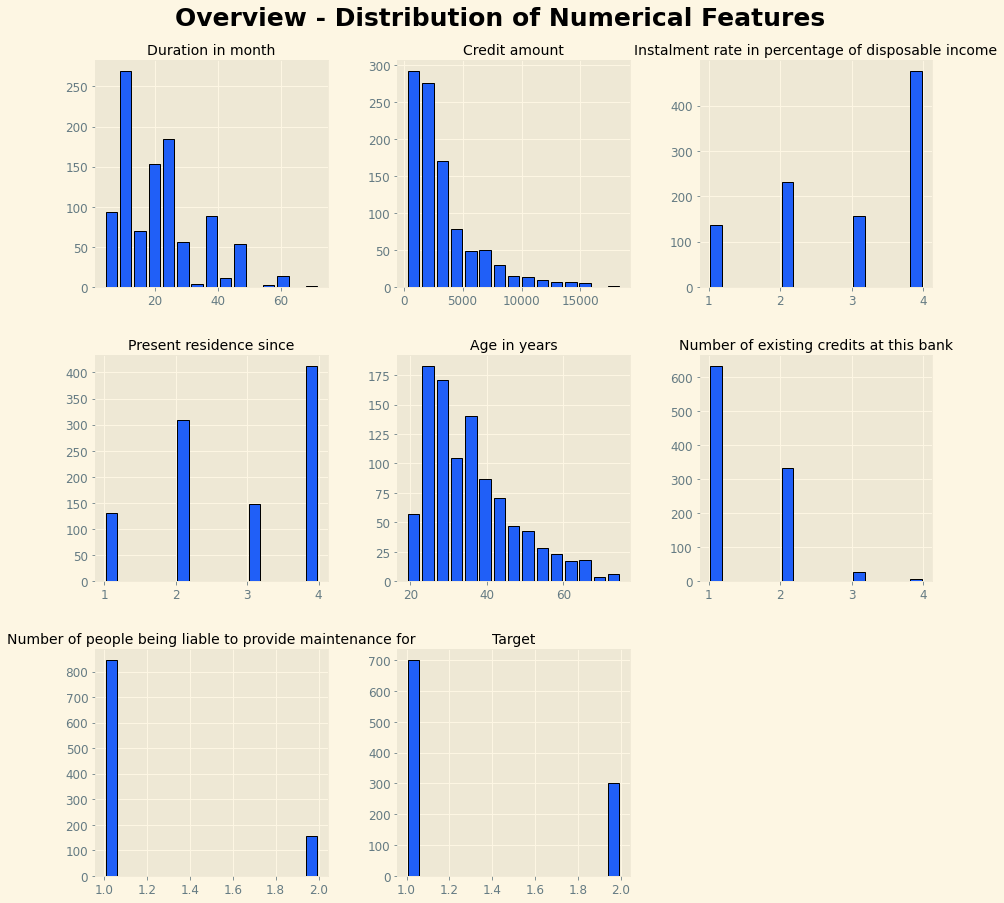

In [7]:
import matplotlib
# Using the style for the plot
plt.style.use('Solarize_Light2')
params = {'axes.titlesize':'14','xtick.labelsize':'12','ytick.labelsize':'12'}
matplotlib.rcParams.update(params)
#Create a Histogram of Dataframe columns with 15 bins
df.hist(edgecolor = 'black', bins = 15, grid = True, figsize = (15, 15), color = '#205ff7', zorder = 2, rwidth = 0.8)
#Add a centred suptitle to the figure
plt.suptitle("Overview - Distribution of Numerical Features", fontsize = 25, y = 0.93, fontweight='bold')
plt.show()

### Data Cleaning - Dropping Various Irrelevant Features

In [8]:
# Dropping the 'Target' column as it is more suited for predictive modeling which is not our focus
df.drop("Target", axis = 1, inplace = True)

# Dropping the 'Savings_account_or_bonds' column given that there is only 1 unique value of 'Savings Account' in 
# that column. Hence, no meaningful insights could be derived from the column, given that all values are the same.
df.drop("Savings account or bonds", axis = 1, inplace = True)

### Data Cleaning - Dropping Nominal Categorical Features

In [9]:
df.drop("Purpose", axis = 1, inplace = True)

df.drop("Personal status and sex", axis = 1, inplace = True)

df.drop("Property", axis = 1, inplace = True)

df.drop("Other installment plans", axis = 1, inplace = True)

df.drop("Job", axis = 1, inplace = True)

### Data Cleaning - Replacing Column Name Spaces with Underscores

In [10]:
# By replacing spaces with underscores, it allows us to call the dataframe attributes
df.columns = [c.replace(' ', '_') for c in df.columns]
df.columns

Index(['Account_Status', 'Duration_in_month', 'Credit_History',
       'Credit_amount', 'Present_employment_since',
       'Instalment_rate_in_percentage_of_disposable_income',
       'Other_debtors_or_guarantors', 'Present_residence_since',
       'Age_in_years', 'Housing', 'Number_of_existing_credits_at_this_bank',
       'Number_of_people_being_liable_to_provide_maintenance_for', 'Telephone',
       'Foreign_worker'],
      dtype='object')

### Data Transformation - Replacing Duration_in_month column with Duration_in_year

In [11]:
df['Duration_in_year'] = df['Duration_in_month']/12

df.drop('Duration_in_month', axis=1, inplace=True)

In [12]:
# shift column 'C' to first position
first_column = df.pop('Duration_in_year')
  
# insert column using insert(position,column_name,first_column) function
df.insert(0, 'Duration_in_year', first_column)

In [13]:
df.describe()

Duration_in_year  Credit_amount  \
count       1000.000000    1000.000000   
mean           1.741917    3271.258000   
std            1.004901    2822.736876   
min            0.333333     250.000000   
25%            1.000000    1365.500000   
50%            1.500000    2319.500000   
75%            2.000000    3972.250000   
max            6.000000   18424.000000   

       Instalment_rate_in_percentage_of_disposable_income  \
count                                        1000.000000    
mean                                            2.973000    
std                                             1.118715    
min                                             1.000000    
25%                                             2.000000    
50%                                             3.000000    
75%                                             4.000000    
max                                             4.000000    

       Present_residence_since  Age_in_years  \
count              1000.000000   1000.000000   
mean                  2.845000     35.546000   
std                   1.103718     11.375469   
min                   1.000000     19.000000   
25%                   2.000000     27.000000   
50%                   3.000000     33.000000   
75%                   4.000000     42.000000   
max                   4.000000     75.000000   

       Number_of_existing_credits_at_this_bank  \
count                              1000.000000   
mean                                  1.407000   
std                                   0.577654   
min                                   1.000000   
25%                                   1.000000   
50%                                   1.000000   
75%                                   2.000000   
max                                   4.000000   

       Number_of_people_being_liable_to_provide_maintenance_for  
count                                        1000.000000         
mean                                            1.155000         
std                                             0.362086         
min                                             1.000000         
25%                                             1.000000         
50%                                             1.000000         
75%                                             1.000000         
max                                             2.000000

### Data Transformation - Identifying Ordinal Categorical Data to Encode

In [14]:
# Extracting columns with object datatype
df_view = df.select_dtypes(include = object)
df_view.head()

Account_Status  \
0  Salary assignments for at least 1 year   
1  Salary assignments for at least 2 year   
2                     No Checking account   
3  Salary assignments for at least 1 year   
4  Salary assignments for at least 1 year   

                                      Credit_History Present_employment_since  \
0  critical account/ other credits existing (not ...                > 7 years   
1           existing credits paid back duly till now              1 - 4 years   
2  critical account/ other credits existing (not ...               4- 7 years   
3           existing credits paid back duly till now               4- 7 years   
4                    delay in paying off in the past              1 - 4 years   

  Other_debtors_or_guarantors   Housing  \
0                        none       own   
1                        none       own   
2                        none       own   
3                   guarantor  for free   
4                        none  for free   

                                  Telephone Foreign_worker  
0  yes, registered under the customers name            yes  
1                                      None            yes  
2                                      None            yes  
3                                      None            yes  
4                                      None            yes

### Data Transformation - Perform Ordinal Encoding on 'Account Status'

In [15]:
#Check for the unique values present in Accout_Status column
df['Account_Status'].unique()

array(['Salary assignments for at least 1 year',
       'Salary assignments for at least 2 year', 'No Checking account',
       'Salary assignments for at least 3 year'], dtype=object)

In [16]:
#Create Mapping for the account status values from 0 to the length-1 of unique values
accountStat_mapping = {'No Checking account':0,
                       'Salary assignments for at least 1 year':1,
                       'Salary assignments for at least 2 year':2,
                       'Salary assignments for at least 3 year':3}

#Perform mapping/encoding of each unique value in account status as an integer
df['Account_Status'] = df['Account_Status'].map(accountStat_mapping).astype(int)
#Check the unique values in account status column
df['Account_Status'].unique()

array([1, 2, 0, 3])

### Data Transformation - Perform Ordinal Encoding on 'Credit History'

In [17]:
#Check for the unique values present in Credit_History column
df['Credit_History'].unique()

array(['critical account/ other credits existing (not at this bank)',
       'existing credits paid back duly till now',
       'delay in paying off in the past',
       'no credits taken/ all credits paid back duly',
       'all credits at this bank paid back duly'], dtype=object)

In [18]:
#Create Mapping for the credit history values from 0 to the length-1 of unique values
credHistory_mapping = {'critical account/ other credits existing (not at this bank)':0,
                       'delay in paying off in the past':1,
                       'existing credits paid back duly till now':2,
                       'all credits at this bank paid back duly':3,
                      'no credits taken/ all credits paid back duly':3}

#Perfo  rm mapping/encoding of each unique value in credit history as an integer
df['Credit_History'] = df['Credit_History'].map(credHistory_mapping).astype(int)
#Check the unique values in account status column
df['Credit_History'].unique()

array([0, 2, 1, 3])

### Data Transformation - Perform Ordinal Encoding on 'Present Employment Since'

In [19]:
#Check for the unique values present in Credit_History column
df['Present_employment_since'].unique()

array(['> 7 years', '1 - 4 years', '4- 7 years', 'unemployed',
       ' < 1 year'], dtype=object)

In [20]:
#Create Mapping for the credit history values from 0 to the length-1 of unique values
employmentStat_mapping = {'unemployed':0,' < 1 year':1,'1 - 4 years':2,
                       '4- 7 years':3,'> 7 years':4}

#Perfo  rm mapping/encoding of each unique value in credit history as an integer
df['Present_employment_since'] = df['Present_employment_since'].map(employmentStat_mapping).astype(int)
#Check the unique values in account status column
df['Present_employment_since'].unique()

array([4, 2, 3, 0, 1])

### Data Transformation - Perform Ordinal Encoding on 'Other Debtors or Guarantors'

In [21]:
#Check for the unique values present in Other Debtors or Guarantors column
df['Other_debtors_or_guarantors'].unique()

array(['none', 'guarantor', 'co-applicant'], dtype=object)

In [22]:
#Create Mapping for the Other Debtors or Guarantors values from 0 to the length-1 of unique values
otherAssistance_mapping = {'none':0,'guarantor':1,'co-applicant':2}

#Perfo  rm mapping/encoding of each unique value in Other Debtors or Guarantors as an integer
df['Other_debtors_or_guarantors'] = df['Other_debtors_or_guarantors'].map(otherAssistance_mapping).astype(int)
#Check the unique values in Other Debtors or Guarantors column
df['Other_debtors_or_guarantors'].unique()

array([0, 1, 2])

### Data Transformation - Perform Ordinal Encoding on 'Housing'

In [23]:
#Check for the unique values present in housing column
df['Housing'].unique()

array(['own', 'for free', 'rent'], dtype=object)

In [24]:
#Create Mapping for the housing values from 0 to the length-1 of unique values
housing_mapping = {'for free':0,'rent':1,'own':2}

#Perform mapping/encoding of each unique value in housing as an integer
df['Housing'] = df['Housing'].map(housing_mapping).astype(int)
#Check the unique values in housing column
df['Housing'].unique()

array([2, 0, 1])

### Data Transformation - Perform Ordinal Encoding on 'Telephone'

In [25]:
#Check for the unique values present in telephone column
df['Telephone'].unique()

array(['yes, registered under the customers name', 'None'], dtype=object)

In [26]:
#Create Mapping for the telephone values from 0 to the length-1 of unique values
telephone_mapping = {'None':0,'yes, registered under the customers name':1}

#Perform mapping/encoding of each unique value in telephone as an integer
df['Telephone'] = df['Telephone'].map(telephone_mapping).astype(int)
#Check the unique values in housing column
df['Telephone'].unique()

array([1, 0])

### Data Transformation - Perform Ordinal Encoding on 'Foreigner Worker'

In [27]:
#Check for the unique values present in foreigner worker column
df['Foreign_worker'].unique()

array(['yes', 'no'], dtype=object)

In [28]:
#Create Mapping for the telephone values from 0 to the length-1 of unique values
foreigner_mapping = {'no':0,'yes':1}

#Perform mapping/encoding of each unique value in telephone as an integer
df['Foreign_worker'] = df['Foreign_worker'].map(foreigner_mapping).astype(int)
#Check the unique values in housing column
df['Foreign_worker'].unique()

array([1, 0])

### Data Transformation - Checking for any other Categorical Variable to Encode

In [29]:
df.dtypes

Duration_in_year                                            float64
Account_Status                                                int32
Credit_History                                                int32
Credit_amount                                                 int64
Present_employment_since                                      int32
Instalment_rate_in_percentage_of_disposable_income            int64
Other_debtors_or_guarantors                                   int32
Present_residence_since                                       int64
Age_in_years                                                  int64
Housing                                                       int32
Number_of_existing_credits_at_this_bank                       int64
Number_of_people_being_liable_to_provide_maintenance_for      int64
Telephone                                                     int32
Foreign_worker                                                int32
dtype: object

In [30]:
df.head()

Duration_in_year  Account_Status  Credit_History  Credit_amount  \
0               0.5               1               0           1169   
1               4.0               2               2           5951   
2               1.0               0               0           2096   
3               3.5               1               2           7882   
4               2.0               1               1           4870   

   Present_employment_since  \
0                         4   
1                         2   
2                         3   
3                         3   
4                         2   

   Instalment_rate_in_percentage_of_disposable_income  \
0                                                  4    
1                                                  2    
2                                                  2    
3                                                  2    
4                                                  3    

   Other_debtors_or_guarantors  Present_residence_since  Age_in_years  \
0                            0                        4            67   
1                            0                        2            22   
2                            0                        3            49   
3                            1                        4            45   
4                            0                        4            53   

   Housing  Number_of_existing_credits_at_this_bank  \
0        2                                        2   
1        2                                        1   
2        2                                        1   
3        0                                        1   
4        0                                        2   

   Number_of_people_being_liable_to_provide_maintenance_for  Telephone  \
0                                                  1                 1   
1                                                  1                 0   
2                                                  2                 0   
3                                                  2                 0   
4                                                  2                 0   

   Foreign_worker  
0               1  
1               1  
2               1  
3               1  
4               1

### Storing original values of dataframe to graph Box Plot Distribution

In [31]:
dfKMeans1 = df.copy(deep = True)
dfKMeans1 = dfKMeans1.loc[:,['Age_in_years', 'Credit_amount']]

dfKMeans2 = df.copy(deep = True)
dfKMeans2 = dfKMeans2.loc[:,['Age_in_years', 'Credit_amount', 'Duration_in_year']]

dfKMeans3 = df.copy(deep = True)
dfKMeans3 = dfKMeans3.loc[:,['Age_in_years', 'Present_employment_since', 'Credit_History']]

dfKMeans4 = df.copy(deep = True)
dfKMeans4 = dfKMeans4.loc[:,['Credit_amount', 'Number_of_existing_credits_at_this_bank', 'Credit_History']]

dfKMeans5 = df.copy(deep = True)
dfKMeans5 = dfKMeans5.loc[:,['Account_Status', 'Housing', 'Credit_amount']]

### Univariate Analysis - Histogram & Boxplot Distribution of Duration in Years

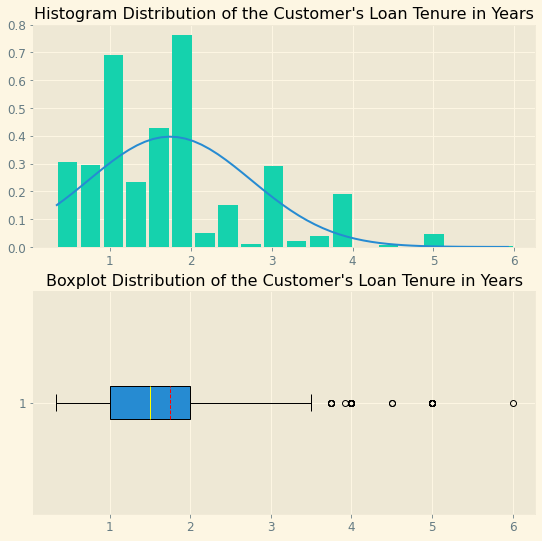

In [32]:
# Using the style for the plot
plt.style.use('Solarize_Light2')

# Create a 2x1 subplot template to plot the histogram and boxplot graphs
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize = (9, 9))

# Plot histogram regarding the distribution of duration in years
ax1.hist(df.Duration_in_year, bins = 20, rwidth = 0.85, density = True, color = '#15D2AD')
rng = np.arange(df.Duration_in_year.min(), df.Duration_in_year.max(), 0.1)
# Plot the normalization curve on top of the histogram distribution
ax1.plot(rng, norm.pdf(rng, df.Duration_in_year.mean(), df.Duration_in_year.std()))
ax1.set_title("Histogram Distribution of the Customer's Loan Tenure in Years", fontweight='normal')

# Plot boxplot regarding the distribution of duration in years
ax2.boxplot(x = df['Duration_in_year'], vert = False, showmeans = True, meanline = True, meanprops = dict(color = 'red'),
            medianprops = dict(color = 'yellow'), patch_artist = True)
ax2.set_title("Boxplot Distribution of the Customer's Loan Tenure in Years", fontweight='normal')
plt.show()

### Univariate Analysis - Histogram & Boxplot Distribution of Credit Amount

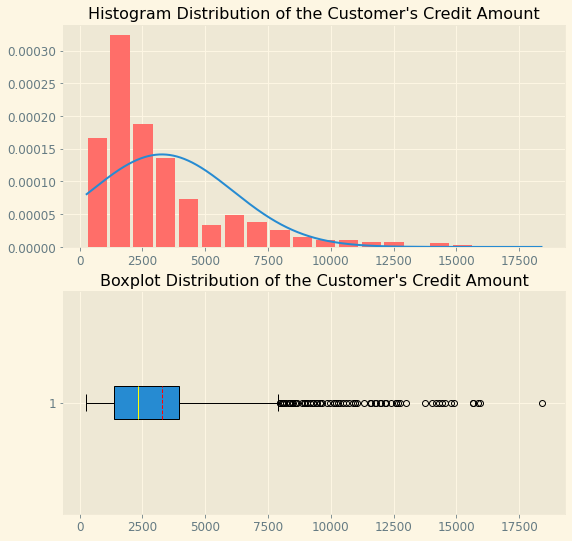

In [33]:
# Using the style for the plot
plt.style.use('Solarize_Light2')

# Create a 2x1 subplot template to plot the histogram and boxplot graphs
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize = (9, 9))

# Plot histogram regarding the distribution of credit amount
ax1.hist(df.Credit_amount, bins = 20, rwidth = 0.85, density = True, color = '#ff6e69')
rng = np.arange(df.Credit_amount.min(), df.Credit_amount.max(), 0.1)
# Plot the normalization curve on top of the histogram distribution
ax1.plot(rng, norm.pdf(rng, df.Credit_amount.mean(), df.Credit_amount.std()))
ax1.set_title("Histogram Distribution of the Customer's Credit Amount", fontweight='normal')

# Plot boxplot regarding the distribution of credit amount
ax2.boxplot(x = df['Credit_amount'], vert = False, showmeans = True, meanline = True, meanprops = dict(color = 'red'),
            medianprops = dict(color = 'yellow'), patch_artist = True)
ax2.set_title("Boxplot Distribution of the Customer's Credit Amount", fontweight='normal')
plt.show()

### Univariate Analysis - Histogram & Boxplot Distribution of Age in Years

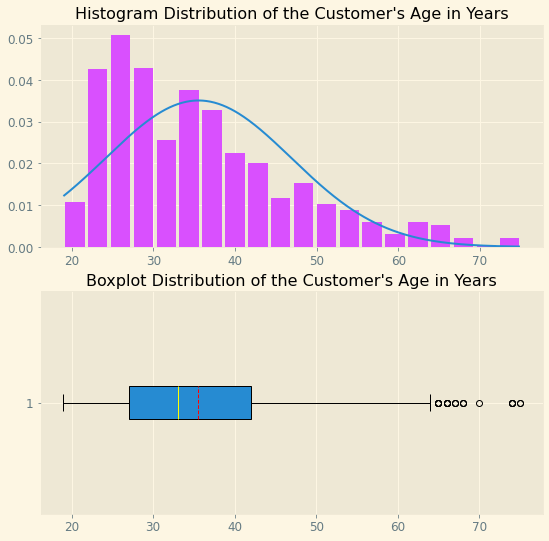

In [34]:
# Using the style for the plot
plt.style.use('Solarize_Light2')
# Create a 2x1 subplot template to plot the histogram and boxplot graphs
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize = (9, 9))
# Plot histogram regarding the distribution of age in years
ax1.hist(df.Age_in_years, bins = 20, rwidth = 0.85, density = True, color = '#d950fe')
rng = np.arange(df.Age_in_years.min(), df.Age_in_years.max(), 0.1)
# Plot the normalization curve on top of the histogram distribution
ax1.plot(rng, norm.pdf(rng, df.Age_in_years.mean(), df.Age_in_years.std()))
ax1.set_title("Histogram Distribution of the Customer's Age in Years", fontweight='normal')
# Plot boxplot regarding the distribution of age in years
ax2.boxplot(x = df['Age_in_years'], vert = False, showmeans = True, meanline = True, meanprops = dict(color = 'red'),
            medianprops = dict(color = 'yellow'), patch_artist = True)
ax2.set_title("Boxplot Distribution of the Customer's Age in Years", fontweight='normal')
plt.show()

### Data Transformation - Feature Scaling using Log Transformation for Skewed Distribution

In [35]:
# Ensure that the features of duration in month, credit amount, age in years are treated equally
# Standard Scaler may not be effective given that it assumes that the distribution of the variable is normal (it is not)
# Use log transformation to handle skewness instead

# Convert the positively skewed distribution of Duration in Years to a normal distribution
df['Duration_in_year'] = np.log(df['Duration_in_year'])

# Convert the positively skewed distribution of Credit amount to a normal distribution
df['Credit_amount'] = np.log(df['Credit_amount'])

# Convert the positively skewed distribution of Age in years to a normal distribution
df['Age_in_years'] = np.log(df['Age_in_years'])

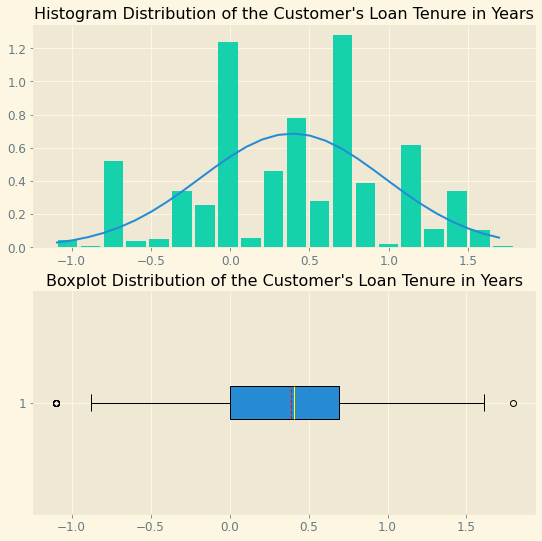

In [36]:
# Using the style for the plot
plt.style.use('Solarize_Light2')
# Create a 2x1 subplot template to plot the histogram and boxplot graphs
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize = (9, 9))
# Plot histogram regarding the distribution of duration in years
ax1.hist(df.Duration_in_year, bins = 20, rwidth = 0.85, density = True, color = '#15D2AD')
rng = np.arange(df.Duration_in_year.min(), df.Duration_in_year.max(), 0.1)
# Plot the normalization curve on top of the histogram distribution
ax1.plot(rng, norm.pdf(rng, df.Duration_in_year.mean(), df.Duration_in_year.std()))
ax1.set_title("Histogram Distribution of the Customer's Loan Tenure in Years", fontweight='normal')
# Plot boxplot regarding the distribution of duration in years
ax2.boxplot(x = df['Duration_in_year'], vert = False, showmeans = True, meanline = True, meanprops = dict(color = 'red'),
            medianprops = dict(color = 'yellow'), patch_artist = True)
ax2.set_title("Boxplot Distribution of the Customer's Loan Tenure in Years", fontweight='normal')
plt.show()

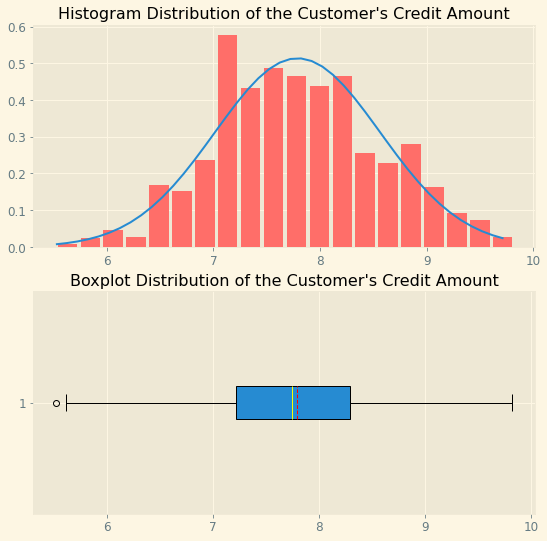

In [37]:
# Using the style for the plot
plt.style.use('Solarize_Light2')
# Create a 2x1 subplot template to plot the histogram and boxplot graphs
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize = (9, 9))
# Plot histogram regarding the distribution of credit amount
ax1.hist(df.Credit_amount, bins = 20, rwidth = 0.85, density = True, color = '#ff6e69')
rng = np.arange(df.Credit_amount.min(), df.Credit_amount.max(), 0.1)
# Plot the normalization curve on top of the histogram distribution
ax1.plot(rng, norm.pdf(rng, df.Credit_amount.mean(), df.Credit_amount.std()))
ax1.set_title("Histogram Distribution of the Customer's Credit Amount", fontweight='normal')
# Plot boxplot regarding the distribution of credit amount
ax2.boxplot(x = df['Credit_amount'], vert = False, showmeans = True, meanline = True, meanprops = dict(color = 'red'),
            medianprops = dict(color = 'yellow'), patch_artist = True)
ax2.set_title("Boxplot Distribution of the Customer's Credit Amount", fontweight='normal')
plt.show()

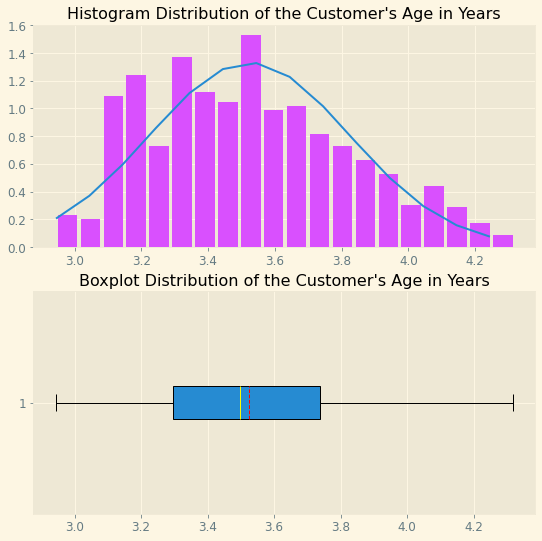

In [38]:
# Using the style for the plot
plt.style.use('Solarize_Light2')
# Create a 2x1 subplot template to plot the histogram and boxplot graphs
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize = (9, 9))
# Plot histogram regarding the distribution of age in years
ax1.hist(df.Age_in_years, bins = 20, rwidth = 0.85, density = True, color = '#d950fe')
rng = np.arange(df.Age_in_years.min(), df.Age_in_years.max(), 0.1)
# Plot the normalization curve on top of the histogram distribution
ax1.plot(rng, norm.pdf(rng, df.Age_in_years.mean(), df.Age_in_years.std()))
ax1.set_title("Histogram Distribution of the Customer's Age in Years", fontweight='normal')
# Plot boxplot regarding the distribution of age in years
ax2.boxplot(x = df['Age_in_years'], vert = False, showmeans = True, meanline = True, meanprops = dict(color = 'red'),
            medianprops = dict(color = 'yellow'), patch_artist = True)
ax2.set_title("Boxplot Distribution of the Customer's Age in Years", fontweight='normal')
plt.show()

### K-Means Clustering Model 1 (Age_in_years, Credit_amount)

#### Customer Segmentation using Age and Credit Amount

In [39]:
# Creating a new dataframe containing only age in years and credit amount
df1 = df.copy(deep=True)
df_age_credit = df1.loc[:,['Age_in_years', 'Credit_amount']]

# Statistics of newly created dataframe
df_age_credit.describe()

Age_in_years  Credit_amount
count   1000.000000    1000.000000
mean       3.524306       7.788691
std        0.299747       0.776474
min        2.944439       5.521461
25%        3.295837       7.219276
50%        3.496508       7.749107
75%        3.737670       8.287088
max        4.317488       9.821409

In [40]:
# Convert dataframe into numpy array, X1
X1 = df_age_credit.values
# Scaling the age_in_years and credit_amount feature to ensure that
# they are comparable
scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1)

In [41]:
# Building the K-means clustering model for age and credit amount

# Using elkan algorithm instead as it would be more efficient than lloyd
# as we are using larger values of n_init and max_iter
kmeansX1_scaled = KMeans(n_clusters=4, n_init=50, max_iter = 450,
                        random_state = 10, algorithm = 'elkan')

# Fitting the model based on the X1_scaled dataset
kmeansX1_scaled.fit(X1_scaled)

KMeans(algorithm='elkan', max_iter=450, n_clusters=4, n_init=50,
       random_state=10)

In [42]:
# Viewing the coordinates of the centroids identified
kmeansX1_scaled.cluster_centers_

array([[-0.82650802, -0.73503807],
       [-0.55557993,  0.78229504],
       [ 0.94873877, -0.73456097],
       [ 1.04380825,  1.11085184]])

In [43]:
# Assigning data points to their respective cluster based on nearest centroid
y1_pred = kmeansX1_scaled.predict(X1_scaled)

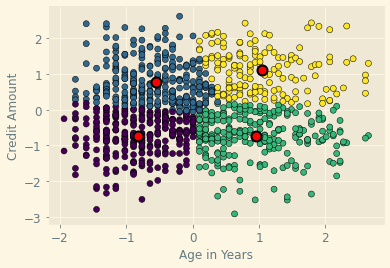

In [44]:
# Visualise the clusters and their corresponding centroids in the below graph
plt.style.use('Solarize_Light2')
plt.scatter(X1_scaled[:,0], X1_scaled[:,1], c = y1_pred, edgecolors='black', linewidth = 0.5)
plt.scatter(kmeansX1_scaled.cluster_centers_[:,0], 
            kmeansX1_scaled.cluster_centers_[:,1], s=100, c='red', edgecolors='black', linewidth = 2)
plt.xlabel('Age in Years')
plt.ylabel('Credit Amount')
plt.show()

In [45]:
# Evaluating the model using Silhouette Score for comparison with Hierarchical Clustering
score = silhouette_score(X1_scaled, kmeansX1_scaled.labels_, metric = 'euclidean')
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.348


#### Improving the model - Customer Segmentation using Age and Credit Amount

We are using Silhouette analysis to determine the optimal number of clusters rather than the elbow method which utilizes Sum of Squared Error given that Silhouette Score will be the basis of our comparison for both K-means clustering and Hierarchical Clustering.

For n_clusters = 2 The average silhouette_score is : 0.333650246992425
For n_clusters = 3 The average silhouette_score is : 0.35925967755057703
For n_clusters = 4 The average silhouette_score is : 0.3490055332063713
For n_clusters = 5 The average silhouette_score is : 0.3484221637846335
For n_clusters = 6 The average silhouette_score is : 0.34581580657834976


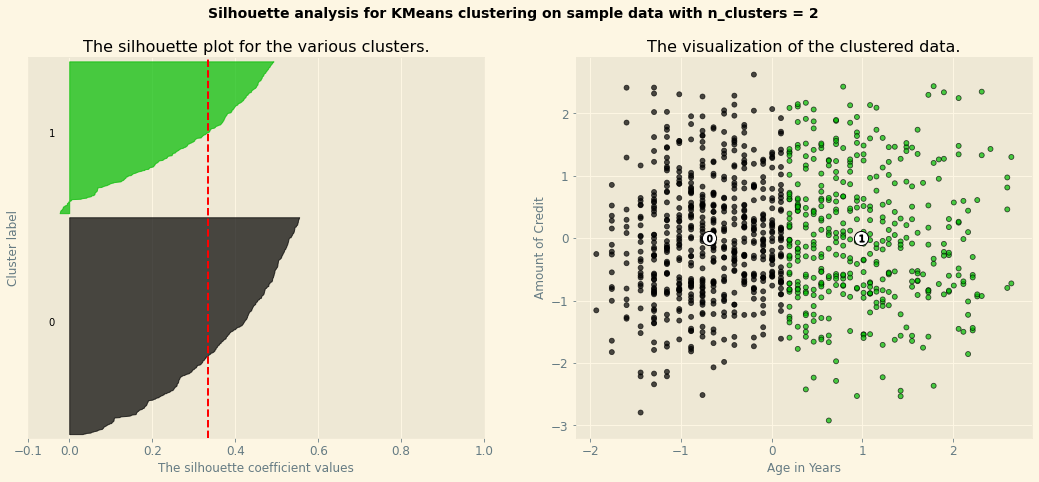

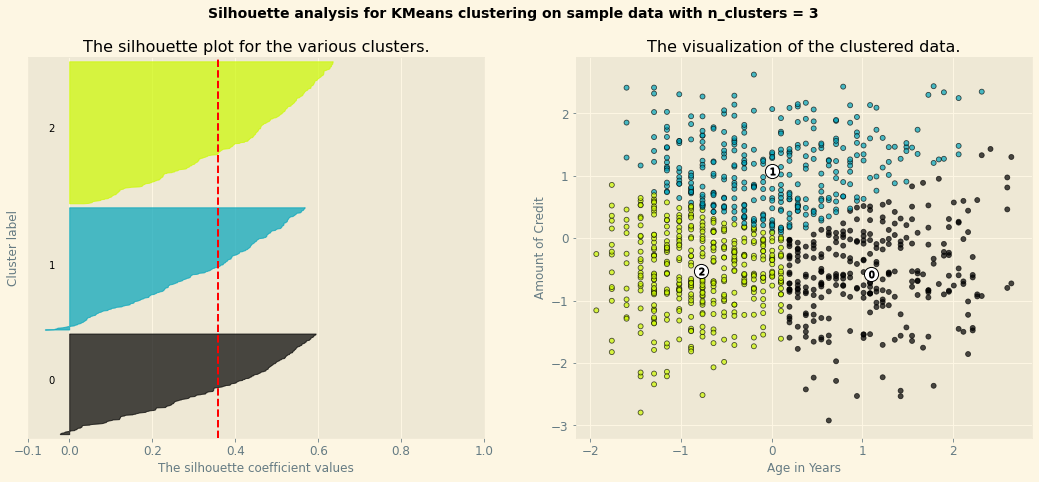

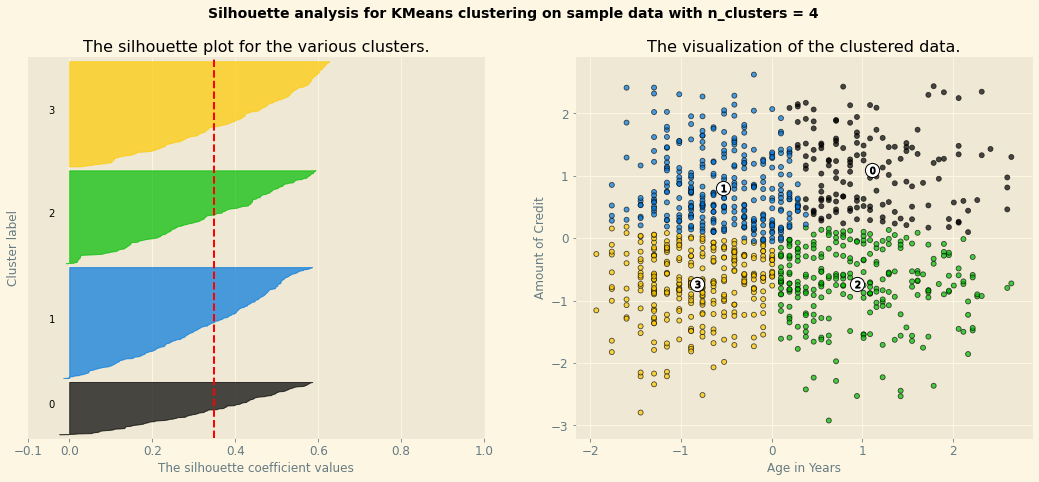

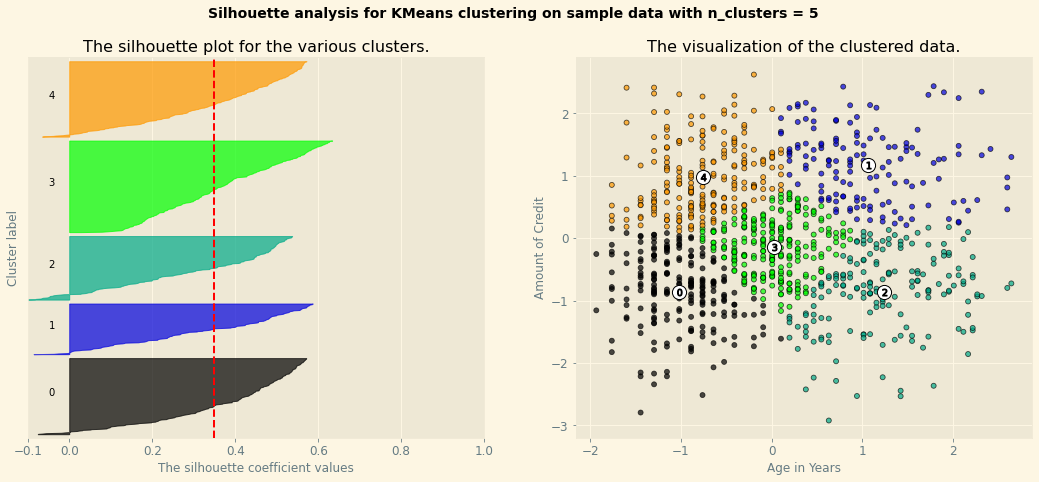

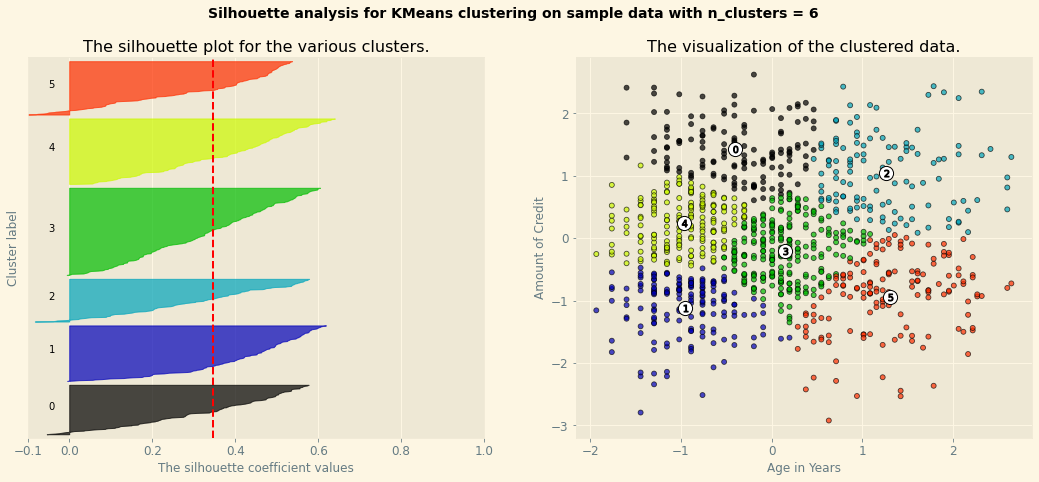

In [46]:
# Reference I had utilized from Sci-Kit Learn:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X1_scaled) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10, algorithm = 'elkan')
    cluster_labels = clusterer.fit_predict(X1_scaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X1_scaled, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X1_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X1_scaled[:, 0], X1_scaled[:, 1], marker=".", s=100, lw=0.8, alpha=0.7, c=colors, edgecolors='black'
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Age in Years")
    ax2.set_ylabel("Amount of Credit")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [47]:
kmeans = KMeans(n_clusters=3, n_init=50, max_iter = 450, 
                random_state = 10, algorithm = 'elkan')
y_pred = kmeans.fit_predict(X1_scaled)

In [48]:
# Add in cluster information into original dataframe (dat)
dfKMeans1['Cluster']=y_pred
dfKMeans1.head()

Age_in_years  Credit_amount  Cluster
0            67           1169        2
1            22           5951        1
2            49           2096        2
3            45           7882        1
4            53           4870        1

Age_in_years


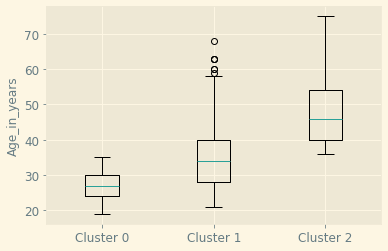

Credit_amount


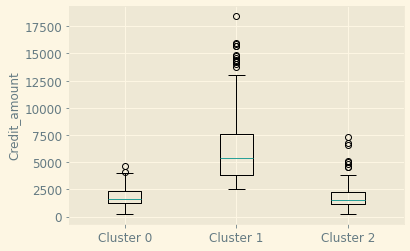

Cluster


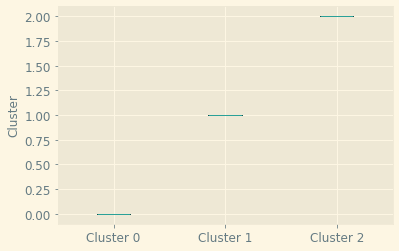

In [49]:
# Groupped Boxplots
i=0
for col in dfKMeans1: 
    print(col) 
    plt.cla()
    plt.boxplot([dfKMeans1.iloc[:,i][dfKMeans1.Cluster==0].tolist(),
                 dfKMeans1.iloc[:,i][dfKMeans1.Cluster==1].tolist(),
                dfKMeans1.iloc[:,i][dfKMeans1.Cluster==2].tolist()],
                 labels=('Cluster 0','Cluster 1','Cluster 2'))    
    plt.ylabel(col)
    plt.show()
    i=i+1

### Hierarchical Clustering Model 1 (Age_in_years, Credit_amount)

#### Customer Segmentation using Age and Credit Amount

In [50]:
# Perform hierarchical/agglomerative clustering
Z1 = shc.linkage(X1_scaled, method = 'ward')
Z1 # A condensed distance matrix

array([[  34.        ,  855.        ,    0.        ,    2.        ],
       [ 421.        ,  984.        ,    0.        ,    2.        ],
       [ 165.        ,  223.        ,    0.        ,    2.        ],
       ...,
       [1992.        , 1993.        ,   19.7824837 ,  487.        ],
       [1988.        , 1996.        ,   27.89310254,  650.        ],
       [1995.        , 1997.        ,   35.39617056, 1000.        ]])

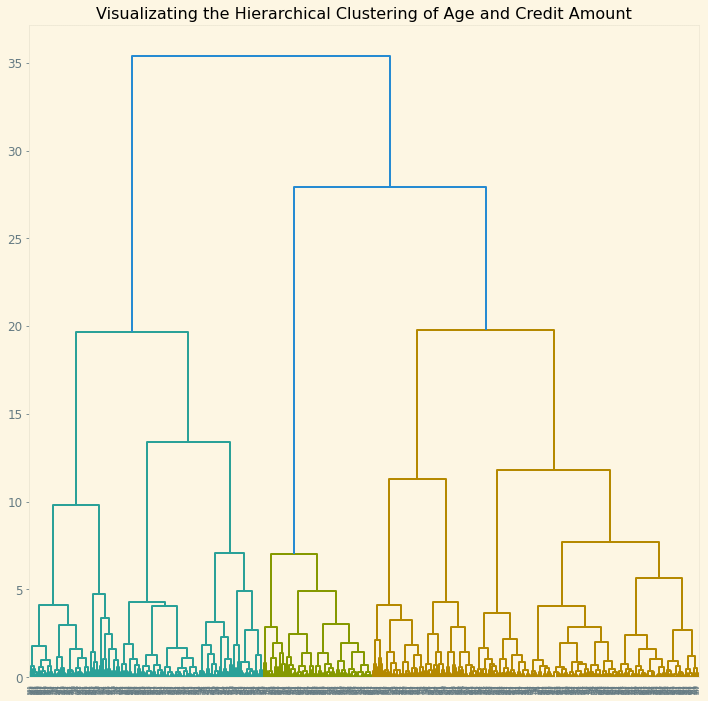

In [51]:
# Visualizing the hierarchical clustering through dendograms
# to find a a rough estimate of the optimal number of clusters
plt.figure(figsize = (12,12))
plt.title('Visualizating the Hierarchical Clustering of Age and Credit Amount')
Dendogram = shc.dendrogram(Z1)

From the above dendrogram, we could observe that three clusters may be a good choice to start from as observed from the largest vertical distance.

In [52]:
# Building the Agglomerative Clustering model with number of clusters set to 3
hClusterX1_scaled = AgglomerativeClustering(
    n_clusters = 3, linkage = 'ward', affinity = 'euclidean')
hClusterX1_scaled

AgglomerativeClustering(n_clusters=3)

In [53]:
# Fitting the model to the data and predictign the clusters
hClusterX1_scaled.fit_predict(X1_scaled)

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 2, 1, 2, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 2, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 2, 0, 2, 0, 0,
       1, 1, 0, 2, 0, 0, 0, 0, 2, 0, 1, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 2, 1, 1, 2, 2, 0,
       0, 2, 1, 1, 2, 0, 1, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1,
       1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 2, 1, 2, 1, 2, 0, 1, 2, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 2, 1, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 2, 0, 0, 1, 2, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 0, 1, 0, 0, 0, 0, 1, 2, 2,
       0, 1, 1, 2, 0, 2, 1, 0, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       2, 2, 2, 0, 0, 0, 0, 1, 2, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 0, 2, 1,
       0, 2, 0, 2, 1, 1, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1,
       1, 1, 0, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,

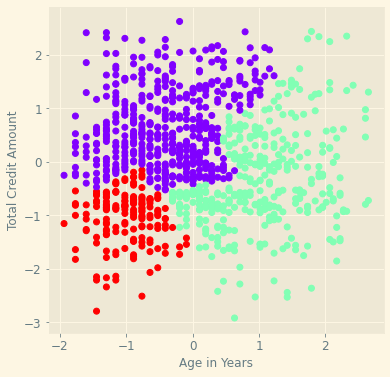

In [54]:
# Visualizing the 3 clusters
plt.figure(figsize = (6,6))
plt.scatter(X1_scaled[:,0], X1_scaled[:,1],c=hClusterX1_scaled.fit_predict(X1_scaled),cmap = 'rainbow')
plt.xlabel('Age in Years')
plt.ylabel('Total Credit Amount')
plt.show()

In [55]:
# Evaluating the model using Silhouette Score for comparison with Hierarchical Clustering
score = silhouette_score(X1_scaled, hClusterX1_scaled.labels_, metric = 'euclidean')
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.293


#### Improving the model - Customer Segmentation using Age and Credit Amount

In [56]:
k_range = range(2, 7)
silhouette_scorings = []
for i in k_range:
    ac_i = AgglomerativeClustering(n_clusters = i, linkage = 'ward',
                                   affinity = 'euclidean')
    silhouette_scorings.append(silhouette_score(X1_scaled, ac_i.fit_predict(X1_scaled)))

In [57]:
silhouette_scorings

[0.3084184596019151,
 0.29258285948613755,
 0.2856495216280872,
 0.30092386531215265,
 0.29549654641407774]

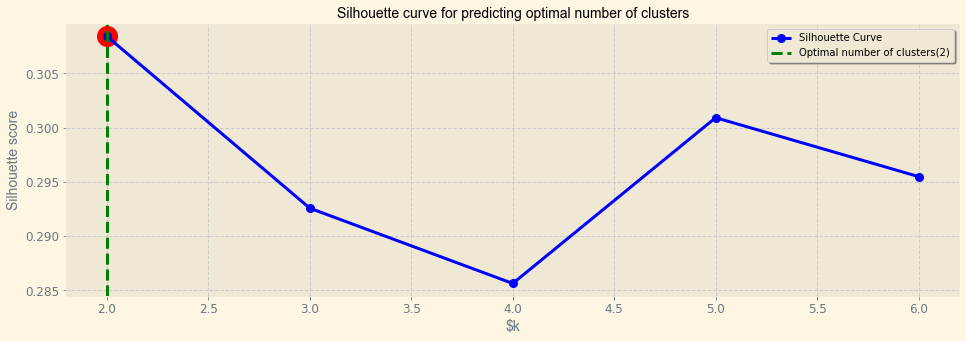

In [58]:
# Reference I had utilized to build the following plot:
# https://www.youtube.com/watch?v=Qh7VxLsaU9M
# Plot the silhouettes scores graph
rcParams['figure.figsize'] = 16,5
plt.plot(range(2,7), silhouette_scorings, "bo-",
         linewidth = 3, markersize=8, label = 'Silhouette Curve')
plt.xlabel("$k", fontsize=14, family='Arial')
plt.ylabel("Silhouette score", fontsize=14, family='Arial')
plt.grid(which = "major", color = '#cccccc', linestyle='--')
plt.title("Silhouette curve for predicting optimal number of clusters",
         family='Arial', fontsize = 14)
# Calculate the optimal number of clusters
k = np.argmax(silhouette_scorings) + 2
# Draw a veritical line to mark the optimal number of cluster
plt.axvline(x=k, linestyle='--', c='green', linewidth = 3,
           label = 'Optimal number of clusters({})'.format(k))
plt.scatter(k, silhouette_scorings[k-2], c='red', s=400)
plt.legend(shadow = True)
plt.show()

In [59]:
# Building the Agglomerative Clustering model with number of clusters set to 2
hClusterX1_scaled_improved = AgglomerativeClustering(
    n_clusters = 2, linkage = 'ward', affinity = 'euclidean')
hClusterX1_scaled_improved

AgglomerativeClustering()

In [60]:
# Fitting the model to the data and predictign the clusters
hClusterX1_scaled_improved.fit_predict(X1_scaled)

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,

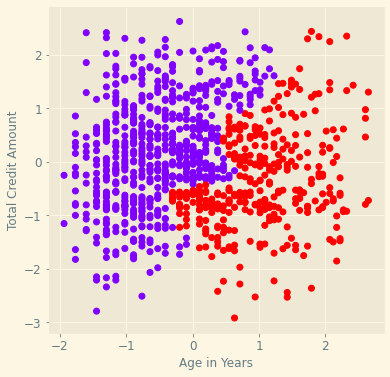

In [61]:
# Visualizing the 2 clusters
plt.figure(figsize = (6,6))
plt.scatter(X1_scaled[:,0], X1_scaled[:,1],
            c=hClusterX1_scaled_improved.fit_predict(X1_scaled),
           cmap = 'rainbow')
plt.xlabel('Age in Years')
plt.ylabel('Total Credit Amount')
plt.show()

In [62]:
# Evaluating the model using Silhouette Score for comparison with Hierarchical Clustering
score = silhouette_score(X1_scaled, hClusterX1_scaled_improved.labels_, metric = 'euclidean')
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.308


### K-Means Clustering Model 2 (Age_in_years, Credit_amount, Duration_in_year)

In [63]:
# Creating a new dataframe containing only age in years, credit amount, and duration in months
df2 = df.copy(deep = True)
df_age_credit_tenure = df2.loc[:,['Age_in_years', 'Credit_amount', 'Duration_in_year']]

# Statistics of newly created dataframe
df_age_credit_tenure.describe()

Age_in_years  Credit_amount  Duration_in_year
count   1000.000000    1000.000000       1000.000000
mean       3.524306       7.788691          0.392111
std        0.299747       0.776474          0.582240
min        2.944439       5.521461         -1.098612
25%        3.295837       7.219276          0.000000
50%        3.496508       7.749107          0.405465
75%        3.737670       8.287088          0.693147
max        4.317488       9.821409          1.791759

In [64]:
# Convert dataframe into numpy array, X2
X2 = df_age_credit_tenure.values

# Scaling the age_in_years, credit_amount, and duration_in_month  
# feature to ensure that they are comparable
scaler = StandardScaler()
X2_scaled = scaler.fit_transform(X2)

In [65]:
# Building the K-means clustering model for age, credit amount, and duration in months

# Using elkan algorithm instead as it would be more efficient than lloyd
# as we are using larger values of n_init and max_iter
kmeansX2_scaled = KMeans(n_clusters=4, n_init=50, max_iter = 450,
                        random_state = 10, algorithm = 'elkan')

# Fitting the model based on the X1_scaled dataset
kmeansX2_scaled.fit(X2_scaled)

KMeans(algorithm='elkan', max_iter=450, n_clusters=4, n_init=50,
       random_state=10)

In [66]:
# Viewing the coordinates of the centroids identified
kmeansX2_scaled.cluster_centers_

array([[-0.57628133, -0.89431748, -0.99882451],
       [ 0.1621453 ,  1.26894087,  1.16721074],
       [ 1.2414402 , -0.38650202, -0.47102038],
       [-0.6246793 ,  0.08890201,  0.32419666]])

In [67]:
# Assigning data points to their respective cluster based on nearest centroid
y2_pred = kmeansX2_scaled.predict(X2_scaled)

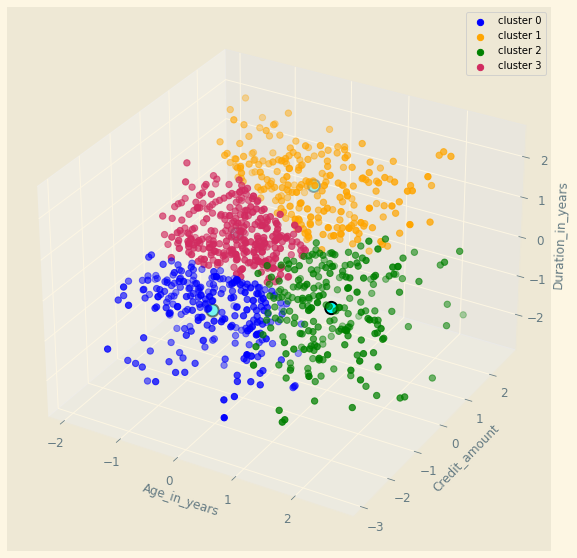

In [68]:
# 3d scatterplot using matplotlib
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X2_scaled[y2_pred == 0,0],X2_scaled[y2_pred == 0,1],X2_scaled[y2_pred == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(X2_scaled[y2_pred == 1,0],X2_scaled[y2_pred == 1,1],X2_scaled[y2_pred == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(X2_scaled[y2_pred == 2,0],X2_scaled[y2_pred == 2,1],X2_scaled[y2_pred == 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.scatter(X2_scaled[y2_pred == 3,0],X2_scaled[y2_pred == 3,1],X2_scaled[y2_pred == 3,2], s = 40 , color = '#D12B60', label = "cluster 3")
ax.scatter(kmeansX2_scaled.cluster_centers_[:,0], kmeansX2_scaled.cluster_centers_[:,1],kmeansX2_scaled.cluster_centers_[:,2],s=150, c='cyan', edgecolors='black', linewidth = 2)
ax.set_xlabel('Age_in_years')
ax.set_ylabel('Credit_amount')
ax.set_zlabel('Duration_in_years')
ax.legend()
plt.show()

In [69]:
# Evaluating the model using Silhouette Score for comparison with Hierarchical Clustering
score = silhouette_score(X2_scaled, kmeansX2_scaled.labels_, metric = 'euclidean')
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.267


#### Improving the model - Customer Segmentation using Age, Credit Amount, Duration in Year

We are using Silhouette analysis to determine the optimal number of clusters rather than the elbow method which utilizes Sum of Squared Error given that Silhouette Score will be the basis of our comparison for both K-means clustering and Hierarchical Clustering.

For n_clusters = 2 The average silhouette_score is : 0.3153441336069185
For n_clusters = 3 The average silhouette_score is : 0.3028297754486483
For n_clusters = 4 The average silhouette_score is : 0.26664167310552034
For n_clusters = 5 The average silhouette_score is : 0.2673542763774321
For n_clusters = 6 The average silhouette_score is : 0.26468135631357065


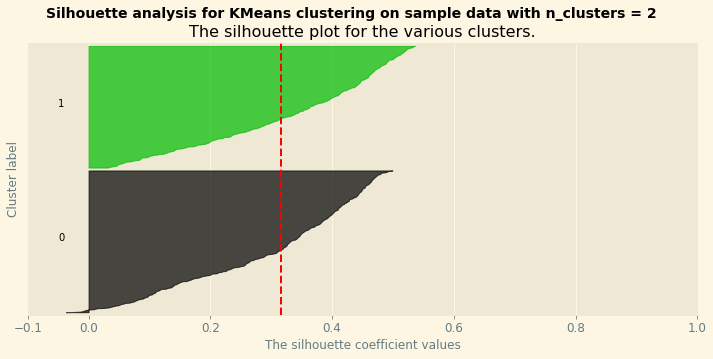

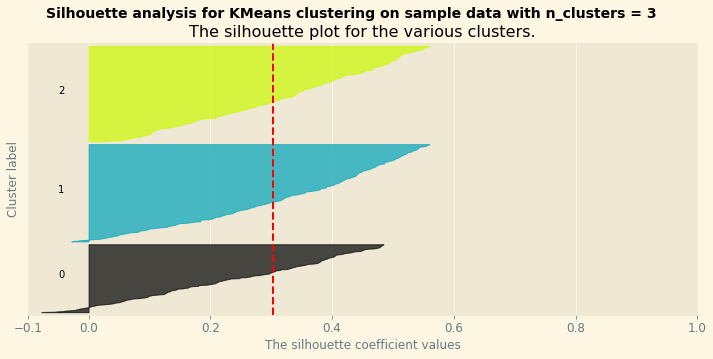

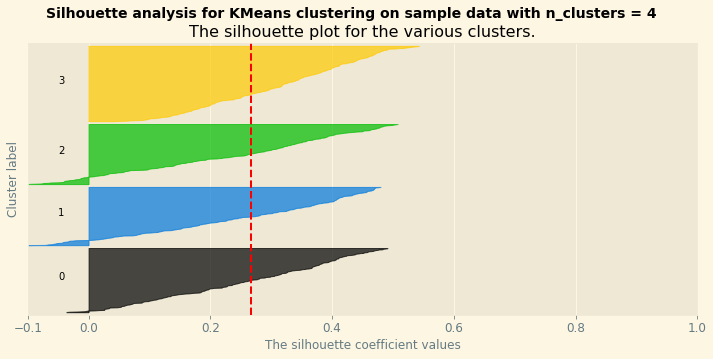

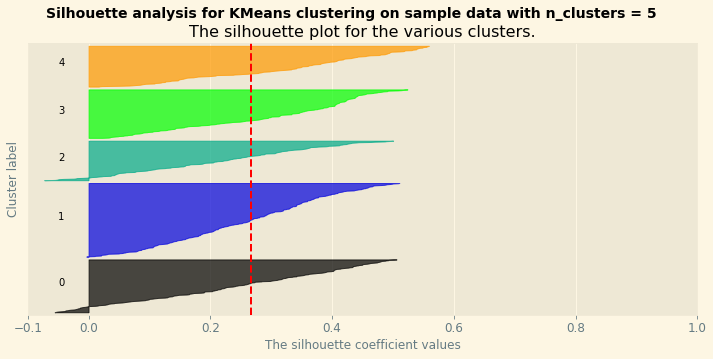

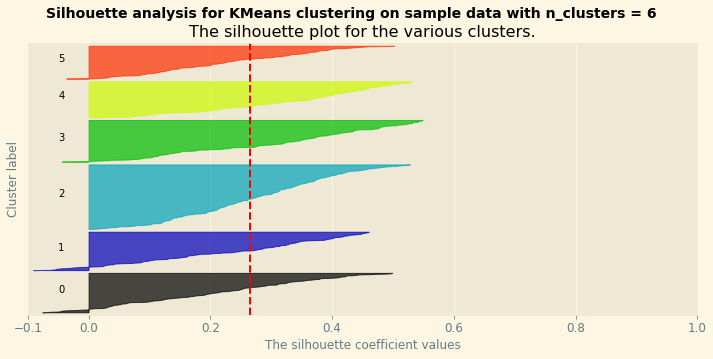

In [70]:
# Reference I had utilized from Sci-Kit Learn:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(12, 5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X2_scaled) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init=50, max_iter = 450,
                        random_state = 10, algorithm = 'elkan')
    cluster_labels = clusterer.fit_predict(X2_scaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X2_scaled, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X2_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [71]:
kmeans = KMeans(n_clusters=2, n_init=50, max_iter = 450, 
                random_state = 10, algorithm = 'elkan')
y_pred = kmeans.fit_predict(X2_scaled)

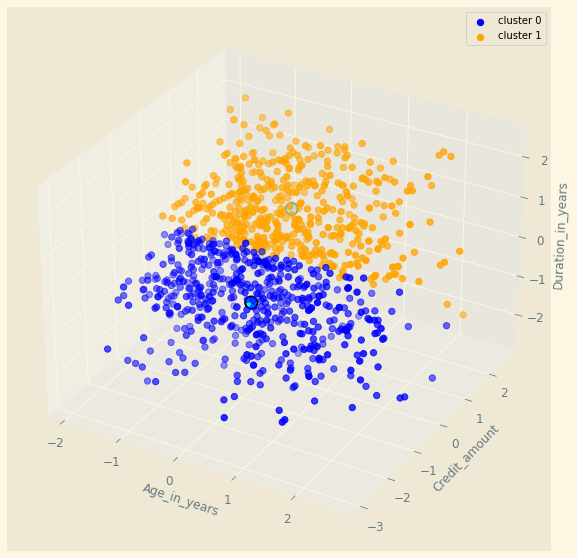

In [72]:
# 3d scatterplot using matplotlib
# Reference I had used as it is hard to interpret the 3D scatterplot

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X2_scaled[y_pred == 0,0],X2_scaled[y_pred == 0,1],X2_scaled[y_pred == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(X2_scaled[y_pred == 1,0],X2_scaled[y_pred == 1,1],X2_scaled[y_pred == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(kmeans.cluster_centers_[:,0], 
            kmeans.cluster_centers_[:,1],
           kmeans.cluster_centers_[:,2],
           s=150, c='cyan', edgecolors='black', linewidth = 2)
ax.set_xlabel('Age_in_years')
ax.set_ylabel('Credit_amount')
ax.set_zlabel('Duration_in_years')
ax.legend()
plt.show()

In [73]:
# Evaluating the model using Silhouette Score for comparison with Hierarchical Clustering
score = silhouette_score(X2_scaled, kmeans.labels_, metric = 'euclidean')
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.315


In [74]:
# Add in cluster information into original dataframe (dat)
dfKMeans2['Cluster']=y_pred
dfKMeans2.head()

Age_in_years  Credit_amount  Duration_in_year  Cluster
0            67           1169               0.5        0
1            22           5951               4.0        1
2            49           2096               1.0        0
3            45           7882               3.5        1
4            53           4870               2.0        1

Age_in_years


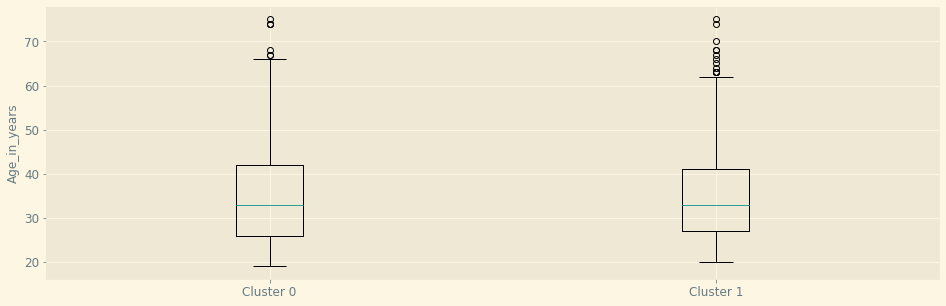

Credit_amount


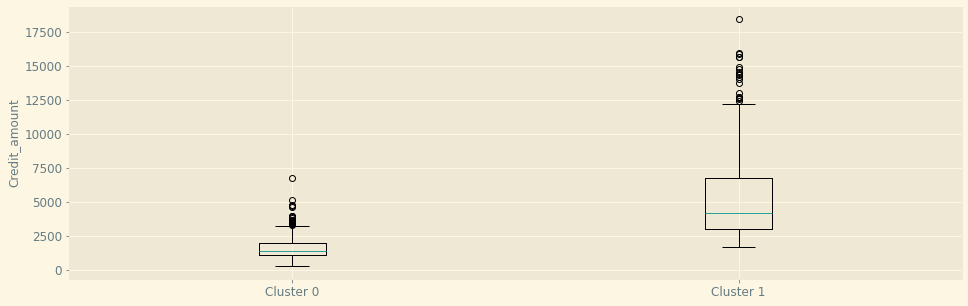

Duration_in_year


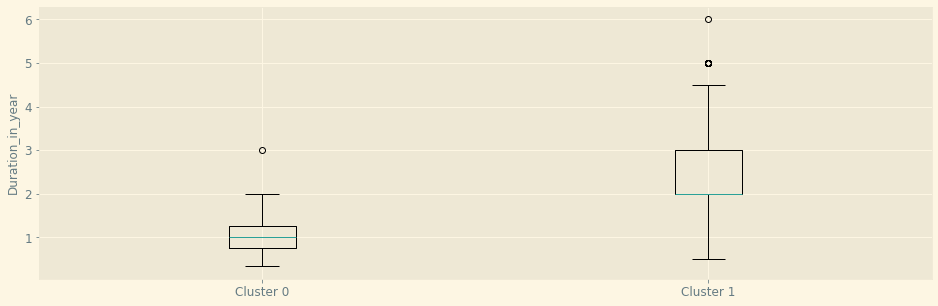

Cluster


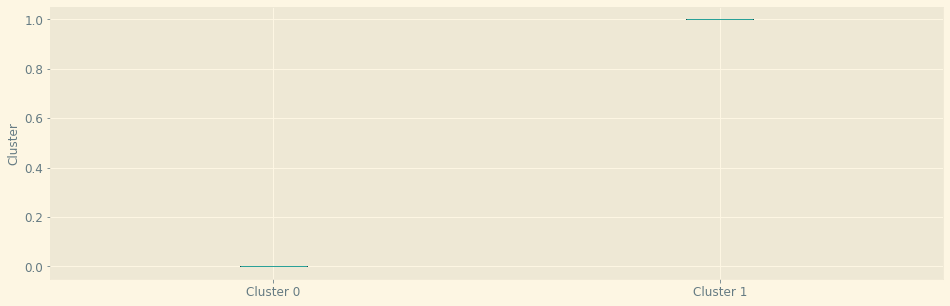

In [75]:
# Groupped Boxplots
i=0
for col in dfKMeans2: 
    print(col) 
    plt.cla()
    plt.boxplot([dfKMeans2.iloc[:,i][dfKMeans2.Cluster==0].tolist(),
                 dfKMeans2.iloc[:,i][dfKMeans2.Cluster==1].tolist()],
                 labels=('Cluster 0','Cluster 1'))    
    plt.ylabel(col)
    plt.show()
    i=i+1

### Hierarchical Clustering Model 2 (Age_in_years, Credit_amount, Duration_in_year)

In [76]:
# Perform hierarchical/agglomerative clustering
Z2 = shc.linkage(X2_scaled, method = 'ward')
Z2 # A condensed distance matrix

array([[1.61000000e+02, 5.80000000e+02, 1.22076501e-03, 2.00000000e+00],
       [3.84000000e+02, 7.39000000e+02, 2.41069737e-03, 2.00000000e+00],
       [1.50000000e+01, 7.55000000e+02, 3.01172876e-03, 2.00000000e+00],
       ...,
       [1.98800000e+03, 1.99300000e+03, 2.47400327e+01, 4.55000000e+02],
       [1.99400000e+03, 1.99600000e+03, 3.22223157e+01, 7.23000000e+02],
       [1.99500000e+03, 1.99700000e+03, 4.10672945e+01, 1.00000000e+03]])

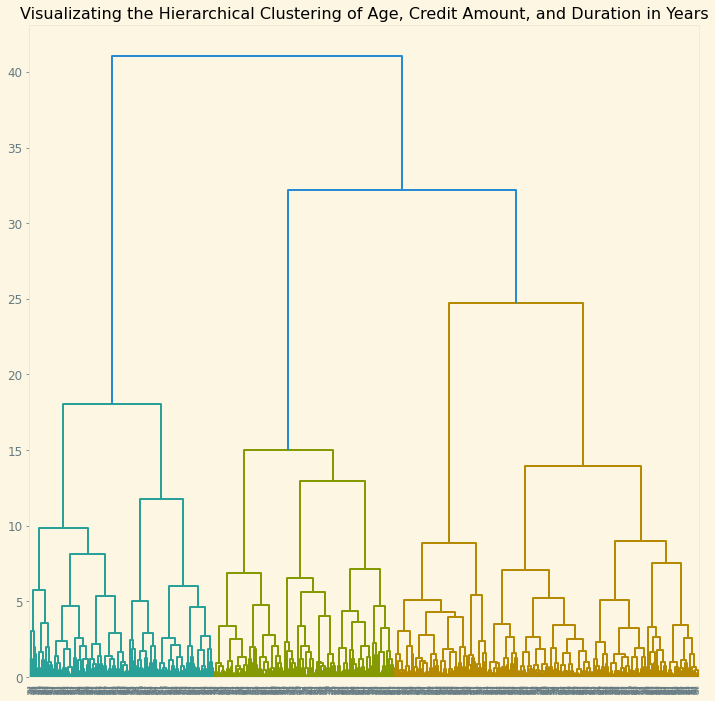

In [77]:
# Visualizing the hierarchical clustering through dendograms
# to find a a rough estimate of the optimal number of clusters

plt.figure(figsize = (12,12))
plt.title('Visualizating the Hierarchical Clustering of Age, Credit Amount, and Duration in Years')
Dendogram = shc.dendrogram(Z2)

In [78]:
# Building the Agglomerative Clustering model with number of clusters set to 3
hClusterX2_scaled = AgglomerativeClustering(
    n_clusters = 3, linkage = 'ward', affinity = 'euclidean')
hClusterX2_scaled

AgglomerativeClustering(n_clusters=3)

In [79]:
# Fitting the model to the data and predictign the clusters
hClusterX2_scaled.fit_predict(X2_scaled)

array([2, 1, 2, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 1, 0, 0, 1, 2, 2, 0, 1, 0, 2, 0, 0, 0, 1, 0,
       1, 2, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 1, 1, 0, 0, 0, 2, 2, 1, 0, 1,
       2, 0, 0, 0, 1, 2, 2, 1, 0, 2, 1, 1, 1, 0, 1, 2, 0, 2, 2, 2, 0, 1,
       0, 0, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 0, 0, 0, 2, 0, 1, 1, 0, 1, 2,
       0, 0, 1, 1, 2, 1, 1, 0, 0, 2, 0, 1, 0, 2, 0, 2, 2, 2, 2, 0, 1, 1,
       0, 2, 1, 2, 1, 2, 0, 2, 0, 1, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 0, 1,
       1, 0, 2, 2, 1, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1,
       2, 2, 2, 2, 1, 1, 0, 1, 0, 0, 1, 2, 0, 0, 1, 1, 1, 0, 0, 2, 0, 0,
       0, 1, 2, 0, 0, 0, 2, 1, 2, 0, 1, 2, 2, 1, 1, 2, 1, 2, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 2, 2, 0, 2, 0, 0, 1, 2, 0, 0, 2,
       0, 0, 2, 0, 2, 2, 0, 0, 2, 2, 0, 1, 0, 1, 0, 2, 0, 2, 2, 2, 1, 2,
       2, 0, 1, 0, 1, 0, 0, 2, 1, 0, 1, 2, 0, 2, 2, 0, 0, 2, 2, 2, 1, 1,
       0, 1, 2, 2, 0, 1, 1, 1, 1, 1, 0, 2, 1, 0, 2,

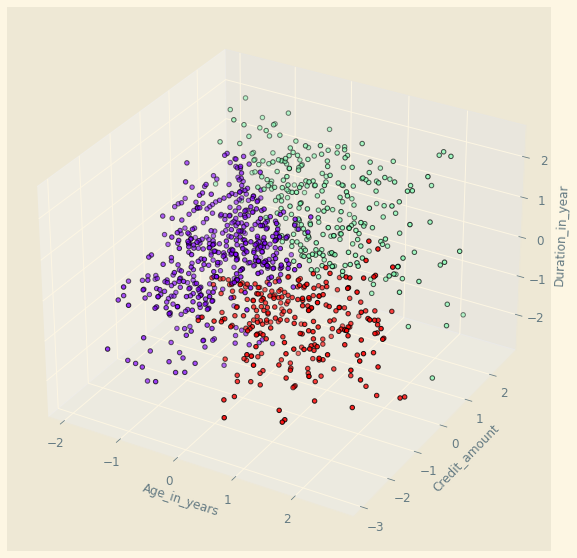

In [80]:
# 3d scatterplot using matplotlib
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection="3d")
ax.scatter3D(X2_scaled[:,0], X2_scaled[:,1], X2_scaled[:,2], c= hClusterX2_scaled.fit_predict(X2_scaled), cmap = 'rainbow',
            edgecolor = 'black');

ax.set_xlabel('Age_in_years')
ax.set_ylabel('Credit_amount')
ax.set_zlabel('Duration_in_year')
plt.show()

In [81]:
# Evaluating the model using Silhouette Score for comparison with Hierarchical Clustering
score = silhouette_score(X2_scaled, hClusterX2_scaled.labels_, metric = 'euclidean')
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.241


#### Improving the model - Customer Segmentation using Age, Credit Amount, Duration in Year

In [82]:
k_range = range(2, 7)
silhouette_scorings = []
for i in k_range:
    ac_i = AgglomerativeClustering(n_clusters = i, linkage = 'ward',
                                   affinity = 'euclidean')
    silhouette_scorings.append(silhouette_score(X2_scaled, ac_i.fit_predict(X2_scaled)))

In [83]:
silhouette_scorings

[0.2715239252669289,
 0.24114611066359173,
 0.23516132192529005,
 0.22637878611347742,
 0.20657375240773734]

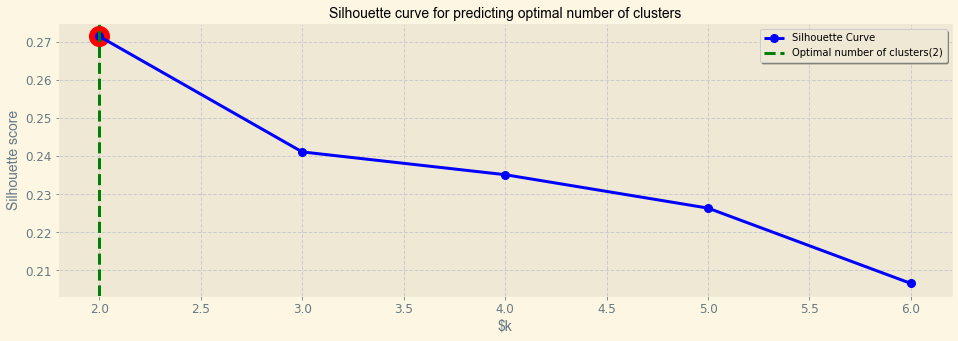

In [84]:
# Reference I had utilized to build the following plot:
# https://www.youtube.com/watch?v=Qh7VxLsaU9M

# Plot the silhouettes scores graph
rcParams['figure.figsize'] = 16,5
plt.plot(range(2,7), silhouette_scorings, "bo-",
         linewidth = 3, markersize=8, label = 'Silhouette Curve')
plt.xlabel("$k", fontsize=14, family='Arial')
plt.ylabel("Silhouette score", fontsize=14, family='Arial')
plt.grid(which = "major", color = '#cccccc', linestyle='--')
plt.title("Silhouette curve for predicting optimal number of clusters",
         family='Arial', fontsize = 14)

# Calculate the optimal number of clusters
k = np.argmax(silhouette_scorings) + 2

# Draw a veritical line to mark the optimal number of cluster
plt.axvline(x=k, linestyle='--', c='green', linewidth = 3,
           label = 'Optimal number of clusters({})'.format(k))
plt.scatter(k, silhouette_scorings[k-2], c='red', s=400)
plt.legend(shadow = True)
plt.show()

In [85]:
# Building the Agglomerative Clustering model with number of clusters set to 2
hClusterX2_scaled_improved = AgglomerativeClustering(
    n_clusters = 2, linkage = 'ward', affinity = 'euclidean')
hClusterX2_scaled_improved

AgglomerativeClustering()

In [86]:
# Fitting the model to the data and predictign the clusters
hClusterX2_scaled_improved.fit_predict(X2_scaled)

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,

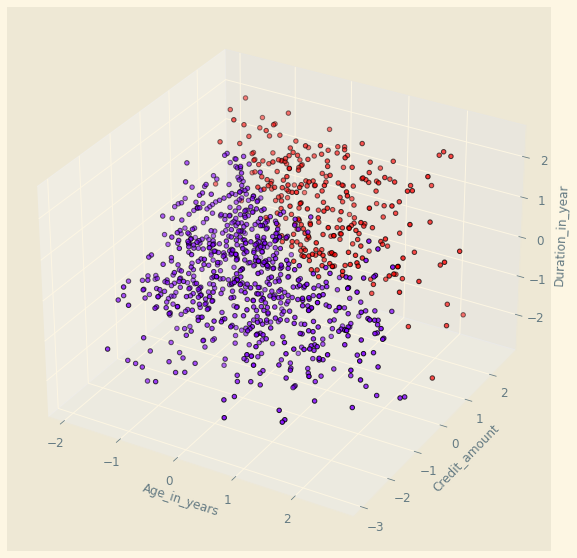

In [87]:
# 3d scatterplot using matplotlib
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection="3d")
ax.scatter3D(X2_scaled[:,0], X2_scaled[:,1], X2_scaled[:,2], c= hClusterX2_scaled_improved.fit_predict(X2_scaled), cmap = 'rainbow',
            edgecolor = 'black');

ax.set_xlabel('Age_in_years')
ax.set_ylabel('Credit_amount')
ax.set_zlabel('Duration_in_year')
plt.show()

In [88]:
# Evaluating the model using Silhouette Score for comparison with Hierarchical Clustering
score = silhouette_score(X2_scaled, hClusterX2_scaled_improved.labels_, metric = 'euclidean')
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.272


In [89]:
df.head()

Duration_in_year  Account_Status  Credit_History  Credit_amount  \
0         -0.693147               1               0       7.063904   
1          1.386294               2               2       8.691315   
2          0.000000               0               0       7.647786   
3          1.252763               1               2       8.972337   
4          0.693147               1               1       8.490849   

   Present_employment_since  \
0                         4   
1                         2   
2                         3   
3                         3   
4                         2   

   Instalment_rate_in_percentage_of_disposable_income  \
0                                                  4    
1                                                  2    
2                                                  2    
3                                                  2    
4                                                  3    

   Other_debtors_or_guarantors  Present_residence_since  Age_in_years  \
0                            0                        4      4.204693   
1                            0                        2      3.091042   
2                            0                        3      3.891820   
3                            1                        4      3.806662   
4                            0                        4      3.970292   

   Housing  Number_of_existing_credits_at_this_bank  \
0        2                                        2   
1        2                                        1   
2        2                                        1   
3        0                                        1   
4        0                                        2   

   Number_of_people_being_liable_to_provide_maintenance_for  Telephone  \
0                                                  1                 1   
1                                                  1                 0   
2                                                  2                 0   
3                                                  2                 0   
4                                                  2                 0   

   Foreign_worker  
0               1  
1               1  
2               1  
3               1  
4               1

### K-Means Clustering Model 3 (Age +  Present Employment Since + Credit History)

#### Customer Segmentation using (Age +  Present Employment Since + Credit History)

In [90]:
df3 = df.copy(deep = True)
df_age_employmentSince_credHist = df3.loc[:,['Age_in_years', 'Present_employment_since', 'Credit_History']]

# Statistics of newly created dataframe
df_age_employmentSince_credHist.describe()

Age_in_years  Present_employment_since  Credit_History
count   1000.000000               1000.000000     1000.000000
mean       3.524306                  2.384000        1.415000
std        0.299747                  1.208306        1.003884
min        2.944439                  0.000000        0.000000
25%        3.295837                  2.000000        0.000000
50%        3.496508                  2.000000        2.000000
75%        3.737670                  4.000000        2.000000
max        4.317488                  4.000000        3.000000

In [91]:
# Convert dataframe into numpy array, X3
X3 = df_age_employmentSince_credHist.values
# Scaling feature to ensure that they are comparable
scaler = StandardScaler()
X3_scaled = scaler.fit_transform(X3)

In [92]:
# Using elkan algorithm instead as it would be more efficient than lloyd
# as we are using larger values of n_init and max_iter
kmeansX3_scaled = KMeans(n_clusters=4, n_init=50, max_iter = 450,
                        random_state = 10, algorithm = 'elkan')

# Fitting the model based on the X3_scaled dataset
kmeansX3_scaled.fit(X3_scaled)

KMeans(algorithm='elkan', max_iter=450, n_clusters=4, n_init=50,
       random_state=10)

In [93]:
# Viewing the coordinates of the centroids identified
kmeansX3_scaled.cluster_centers_

array([[ 0.84002825,  0.50335502,  0.72021621],
       [-0.78070016, -0.49431651,  0.69175156],
       [ 0.70504018,  1.08919421, -1.24892669],
       [-0.14815061, -0.62793554, -1.17001761]])

In [94]:
# Assigning data points to their respective cluster based on nearest centroid
y3_pred = kmeansX3_scaled.predict(X3_scaled)

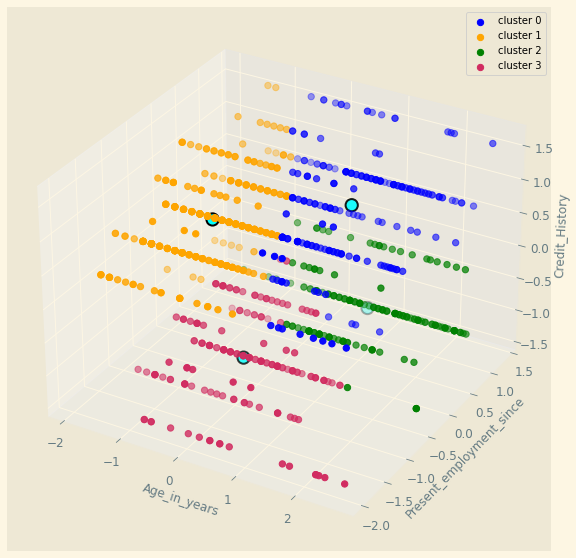

In [95]:
# 3d scatterplot using matplotlib
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X3_scaled[y3_pred == 0,0],X3_scaled[y3_pred == 0,1],X3_scaled[y3_pred == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(X3_scaled[y3_pred == 1,0],X3_scaled[y3_pred == 1,1],X3_scaled[y3_pred == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(X3_scaled[y3_pred == 2,0],X3_scaled[y3_pred == 2,1],X3_scaled[y3_pred == 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.scatter(X3_scaled[y3_pred == 3,0],X3_scaled[y3_pred == 3,1],X3_scaled[y3_pred == 3,2], s = 40 , color = '#D12B60', label = "cluster 3")
ax.scatter(kmeansX3_scaled.cluster_centers_[:,0], kmeansX3_scaled.cluster_centers_[:,1],kmeansX3_scaled.cluster_centers_[:,2],s=150, c='cyan', edgecolors='black', linewidth = 2)
ax.set_xlabel('Age_in_years')
ax.set_ylabel('Present_employment_since')
ax.set_zlabel('Credit_History')
ax.legend()
plt.show()

In [96]:
# Evaluating the model using Silhouette Score for comparison with Hierarchical Clustering
score = silhouette_score(X3_scaled, kmeansX3_scaled.labels_, metric = 'euclidean')
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.345


#### Improving the model - Customer Segmentation using (Age +  Present Employment Since + Credit History)

We are using Silhouette analysis to determine the optimal number of clusters rather than the elbow method which utilizes Sum of Squared Error given that Silhouette Score will be the basis of our comparison for both K-means clustering and Hierarchical Clustering.

For n_clusters = 2 The average silhouette_score is : 0.31612415901834967
For n_clusters = 3 The average silhouette_score is : 0.3399256925594051
For n_clusters = 4 The average silhouette_score is : 0.3446596554954612
For n_clusters = 5 The average silhouette_score is : 0.36034515189914657
For n_clusters = 6 The average silhouette_score is : 0.3475934039772468


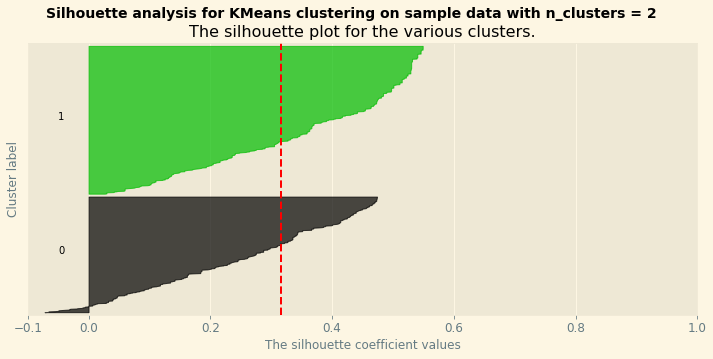

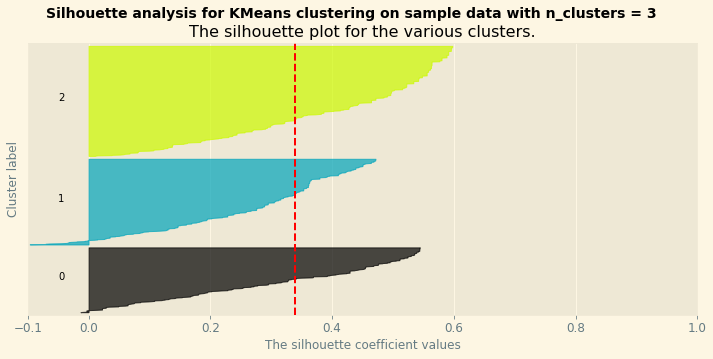

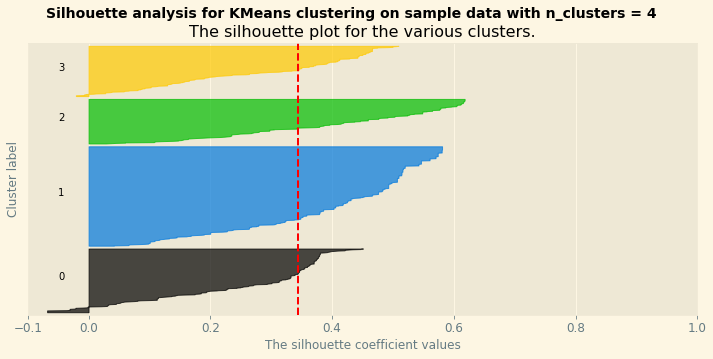

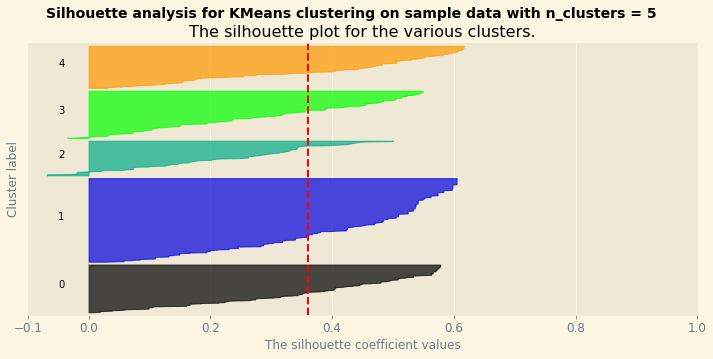

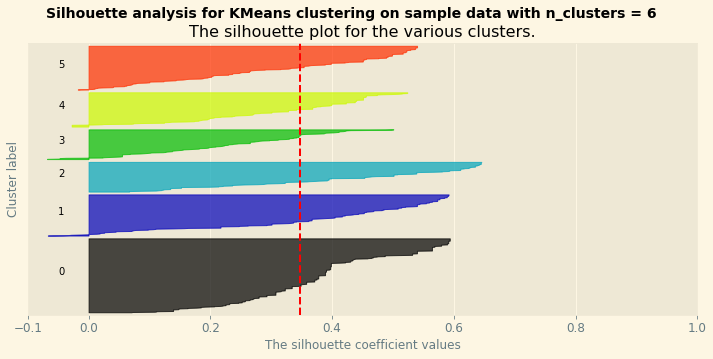

In [97]:
# Reference I had utilized from Sci-Kit Learn:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(12, 5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X3_scaled) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init=50, max_iter = 450,
                        random_state = 10, algorithm = 'elkan')
    cluster_labels = clusterer.fit_predict(X3_scaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X3_scaled, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X3_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [98]:
kmeans = KMeans(n_clusters=5, n_init=50, max_iter = 450, random_state = 10, algorithm = 'elkan')
y_pred = kmeans.fit_predict(X3_scaled)

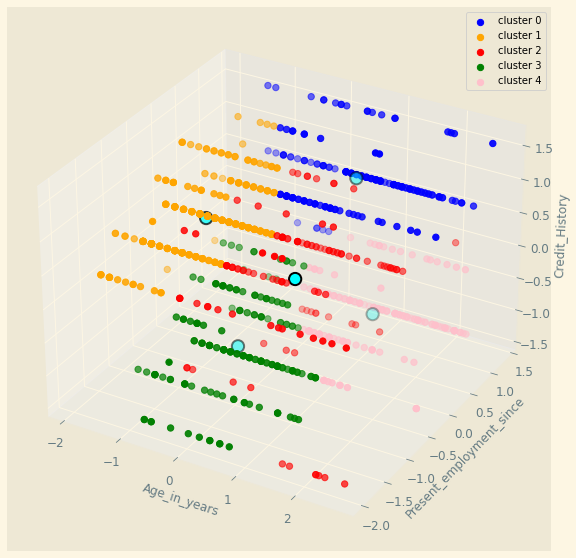

In [99]:
# 3d scatterplot using matplotlib
# Reference I had used as it is hard to interpret the 3D scatterplot

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X3_scaled[y_pred == 0,0],X3_scaled[y_pred == 0,1],X3_scaled[y_pred == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(X3_scaled[y_pred == 1,0],X3_scaled[y_pred == 1,1],X3_scaled[y_pred == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(X3_scaled[y_pred == 2,0],X3_scaled[y_pred == 2,1],X3_scaled[y_pred == 2,2], s = 40 , color = 'red', label = "cluster 2")
ax.scatter(X3_scaled[y_pred == 3,0],X3_scaled[y_pred == 3,1],X3_scaled[y_pred == 3,2], s = 40 , color = 'green', label = "cluster 3")
ax.scatter(X3_scaled[y_pred == 4,0],X3_scaled[y_pred == 4,1],X3_scaled[y_pred == 4,2], s = 40 , color = 'pink', label = "cluster 4")

ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2],
           s=150, c='cyan', edgecolors='black', linewidth = 2)
ax.set_xlabel('Age_in_years')
ax.set_ylabel('Present_employment_since')
ax.set_zlabel('Credit_History')
ax.legend()
plt.show()

In [100]:
# Evaluating the model using Silhouette Score for comparison with Hierarchical Clustering
score = silhouette_score(X3_scaled, kmeans.labels_, metric = 'euclidean')
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.360


In [101]:
# Add in cluster information into original dataframe (dat)
dfKMeans3['Cluster']=y_pred
dfKMeans3.head()

Age_in_years  Present_employment_since  Credit_History  Cluster
0            67                         4               0        4
1            22                         2               2        1
2            49                         3               0        4
3            45                         3               2        0
4            53                         2               1        2

Age_in_years


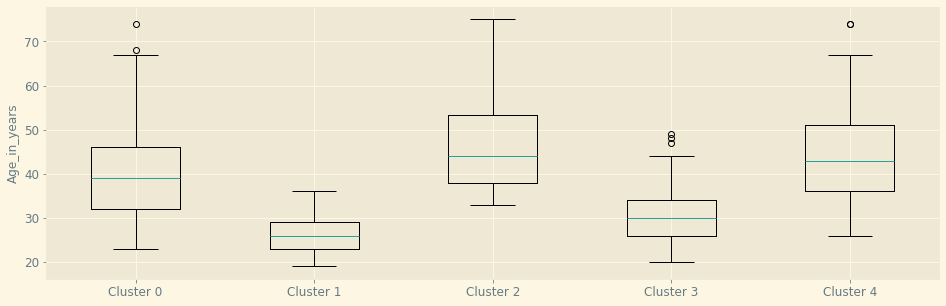

Present_employment_since


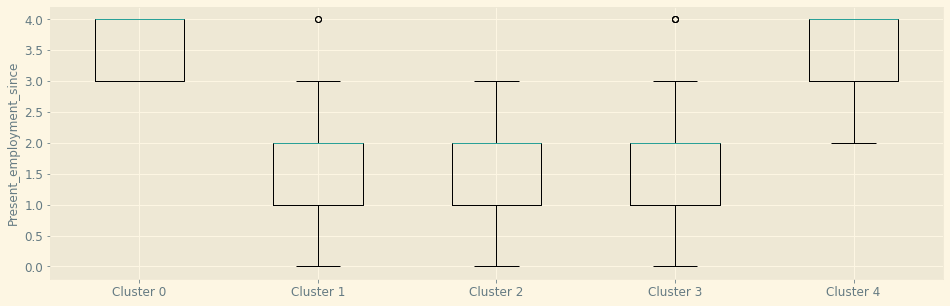

Credit_History


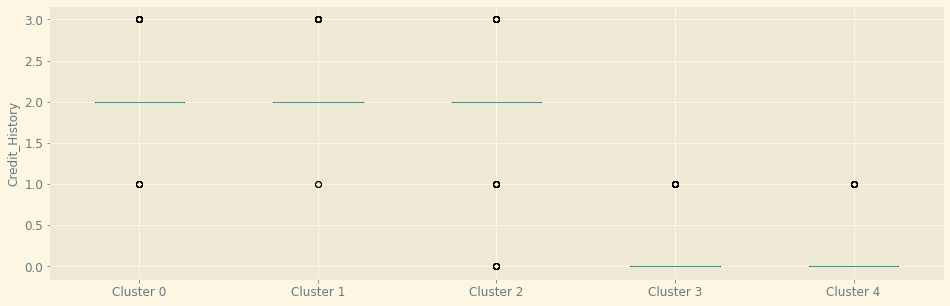

Cluster


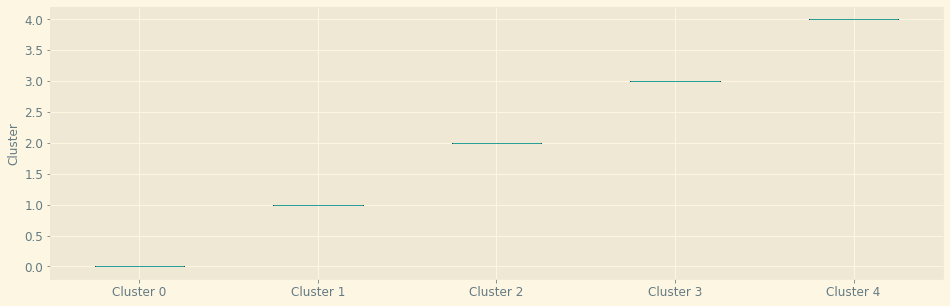

In [102]:
# Groupped Boxplots
i=0
for col in dfKMeans3: 
    print(col) 
    plt.cla()
    plt.boxplot([dfKMeans3.iloc[:,i][dfKMeans3.Cluster==0].tolist(),
                 dfKMeans3.iloc[:,i][dfKMeans3.Cluster==1].tolist(),
                 dfKMeans3.iloc[:,i][dfKMeans3.Cluster==2].tolist(),
                 dfKMeans3.iloc[:,i][dfKMeans3.Cluster==3].tolist(),
                dfKMeans3.iloc[:,i][dfKMeans3.Cluster==4].tolist()],
                 labels=('Cluster 0','Cluster 1','Cluster 2','Cluster 3','Cluster 4'))    
    plt.ylabel(col)
    plt.show()
    i=i+1

### Hierarchical Clustering Model 3 (Age +  Present Employment Since + Credit History)

#### Customer Segmentation using (Age +  Present Employment Since + Credit History)

In [103]:
# Perform hierarchical/agglomerative clustering
Z3 = shc.linkage(X3_scaled, method = 'ward')
Z3 # A condensed distance matrix

array([[1.00000000e+00, 1.20000000e+01, 0.00000000e+00, 2.00000000e+00],
       [2.00000000e+00, 3.03000000e+02, 0.00000000e+00, 2.00000000e+00],
       [5.00000000e+00, 7.00000000e+00, 0.00000000e+00, 2.00000000e+00],
       ...,
       [1.99000000e+03, 1.99300000e+03, 2.45814591e+01, 3.42000000e+02],
       [1.99400000e+03, 1.99500000e+03, 3.10499925e+01, 6.58000000e+02],
       [1.99600000e+03, 1.99700000e+03, 4.19289863e+01, 1.00000000e+03]])

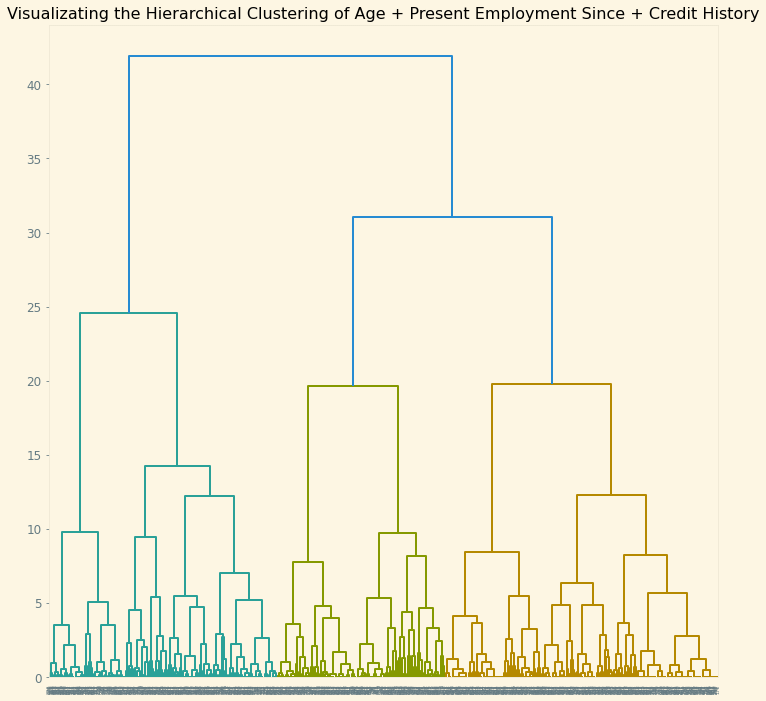

In [104]:
# Visualizing the hierarchical clustering through dendograms
# to find a a rough estimate of the optimal number of clusters

plt.figure(figsize = (12,12))
plt.title('Visualizating the Hierarchical Clustering of Age + Present Employment Since + Credit History')
Dendogram = shc.dendrogram(Z3)

In [105]:
# Building the Agglomerative Clustering model with number of clusters set to 3
hClusterX3_scaled = AgglomerativeClustering(n_clusters = 3, linkage = 'ward', affinity = 'euclidean')
hClusterX3_scaled

AgglomerativeClustering(n_clusters=3)

In [106]:
# Fitting the model to the data and predictign the clusters
hClusterX3_scaled.fit_predict(X3_scaled)

array([0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 2, 1, 0, 2,
       0, 0, 0, 2, 2, 2, 2, 0, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 1, 1, 2, 0,
       0, 0, 2, 1, 0, 1, 0, 1, 1, 1, 0, 1, 2, 0, 1, 0, 1, 0, 2, 1, 1, 2,
       1, 1, 2, 1, 1, 0, 0, 0, 2, 0, 1, 2, 2, 1, 2, 2, 1, 2, 2, 0, 0, 2,
       1, 1, 0, 0, 0, 0, 2, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 0, 2, 1, 1, 2,
       1, 1, 1, 0, 2, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 2, 1, 0, 0, 1, 0,
       1, 2, 1, 0, 0, 2, 0, 2, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 2, 2, 1, 0,
       1, 1, 0, 2, 2, 0, 0, 0, 1, 2, 2, 1, 1, 1, 1, 0, 2, 1, 0, 2, 0, 2,
       2, 0, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 1, 1, 2, 1, 2, 1, 1, 0, 0, 1,
       2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 2, 0, 2, 2, 0, 0, 0, 1, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 0, 1, 1, 2, 0, 2, 1, 2,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 2, 1, 2, 1, 0, 0, 1, 1, 0, 1, 2, 0, 0,
       0, 2, 0, 1, 2, 1, 1, 0, 1, 1, 1, 1, 0, 2, 1, 1, 0, 2, 2, 0, 0, 1,
       1, 0, 2, 2, 1, 1, 0, 0, 0, 1, 1, 2, 2, 0, 2,

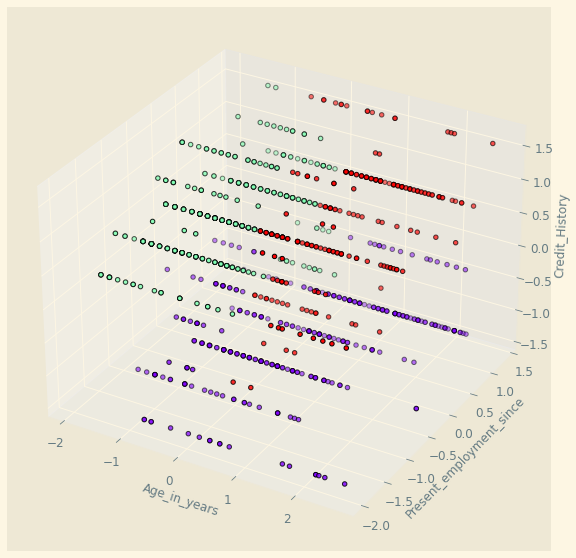

In [107]:
# 3d scatterplot using matplotlib
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection="3d")
ax.scatter3D(X3_scaled[:,0], X3_scaled[:,1], X3_scaled[:,2], c= hClusterX3_scaled.fit_predict(X3_scaled), cmap = 'rainbow',
            edgecolor = 'black');

ax.set_xlabel('Age_in_years')
ax.set_ylabel('Present_employment_since')
ax.set_zlabel('Credit_History')
plt.show()

In [108]:
# Evaluating the model using Silhouette Score for comparison with Hierarchical Clustering
score = silhouette_score(X3_scaled, hClusterX3_scaled.labels_, metric = 'euclidean')
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.293


#### Improving the model - Customer Segmentation using (Age +  Present Employment Since + Credit History)

In [109]:
k_range = range(2, 7)
silhouette_scorings = []
for i in k_range:
    ac_i = AgglomerativeClustering(n_clusters = i, linkage = 'ward',
                                   affinity = 'euclidean')
    silhouette_scorings.append(silhouette_score(X3_scaled, ac_i.fit_predict(X3_scaled)))

In [110]:
silhouette_scorings

[0.3202718426310124,
 0.2934982681805698,
 0.30220143910449915,
 0.2728401749318875,
 0.30243283629944423]

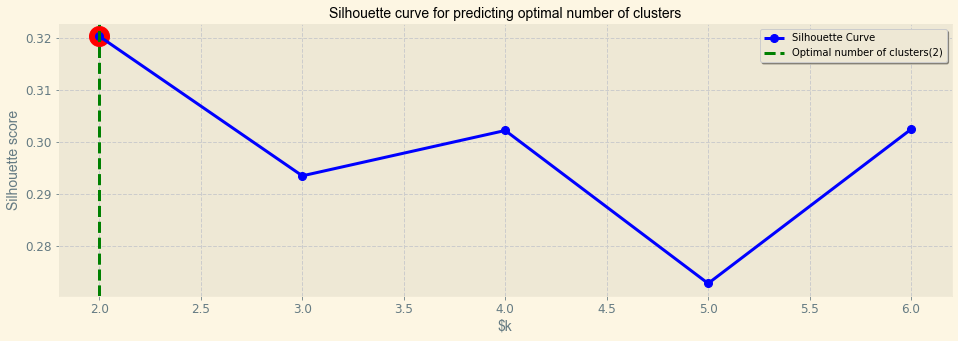

In [111]:
# Reference I had utilized to build the following plot:
# https://www.youtube.com/watch?v=Qh7VxLsaU9M

# Plot the silhouettes scores graph
rcParams['figure.figsize'] = 16,5
plt.plot(range(2,7), silhouette_scorings, "bo-",
         linewidth = 3, markersize=8, label = 'Silhouette Curve')
plt.xlabel("$k", fontsize=14, family='Arial')
plt.ylabel("Silhouette score", fontsize=14, family='Arial')
plt.grid(which = "major", color = '#cccccc', linestyle='--')
plt.title("Silhouette curve for predicting optimal number of clusters",
         family='Arial', fontsize = 14)

# Calculate the optimal number of clusters
k = np.argmax(silhouette_scorings) + 2

# Draw a veritical line to mark the optimal number of cluster
plt.axvline(x=k, linestyle='--', c='green', linewidth = 3,
           label = 'Optimal number of clusters({})'.format(k))
plt.scatter(k, silhouette_scorings[k-2], c='red', s=400)
plt.legend(shadow = True)
plt.show()

In [112]:
# Building the Agglomerative Clustering model with number of clusters set to 2
hClusterX3_scaled_improved = AgglomerativeClustering(
    n_clusters = 2, linkage = 'ward', affinity = 'euclidean')
hClusterX3_scaled_improved

AgglomerativeClustering()

In [113]:
# Fitting the model to the data and predictign the clusters
hClusterX3_scaled_improved.fit_predict(X3_scaled)

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,

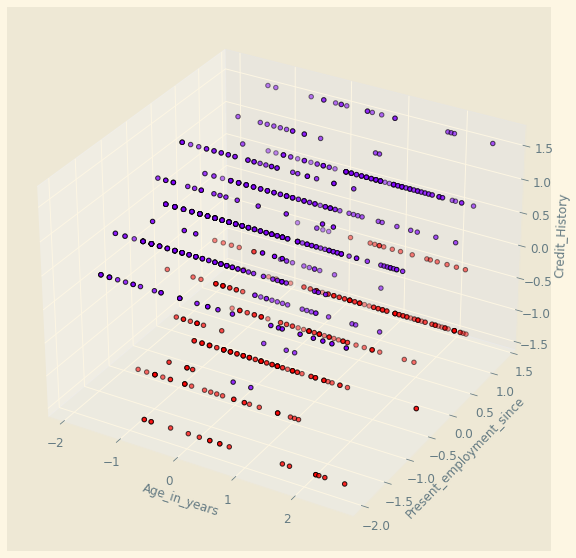

In [114]:
# 3d scatterplot using matplotlib
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection="3d")
ax.scatter3D(X3_scaled[:,0], X3_scaled[:,1], X3_scaled[:,2], c= hClusterX3_scaled_improved.fit_predict(X3_scaled), cmap = 'rainbow',
            edgecolor = 'black');

ax.set_xlabel('Age_in_years')
ax.set_ylabel('Present_employment_since')
ax.set_zlabel('Credit_History')
plt.show()

In [115]:
# Evaluating the model using Silhouette Score for comparison with Hierarchical Clustering
score = silhouette_score(X3_scaled, hClusterX3_scaled_improved.labels_, metric = 'euclidean')
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.320


### K-Means Clustering Model 4 (Credit_amount, Number_of_existing_credits_at_this_bank, Credit_History)

#### Customer Segmentation using (Credit_amount, Number_of_existing_credits_at_this_bank, Credit_History)

In [116]:
df4 = df.copy(deep = True)
df_credAmount_credNum_credHist = df4.loc[:,['Credit_amount', 'Number_of_existing_credits_at_this_bank', 'Credit_History']]

# Statistics of newly created dataframe
df_credAmount_credNum_credHist.describe()

Credit_amount  Number_of_existing_credits_at_this_bank  Credit_History
count    1000.000000                              1000.000000     1000.000000
mean        7.788691                                 1.407000        1.415000
std         0.776474                                 0.577654        1.003884
min         5.521461                                 1.000000        0.000000
25%         7.219276                                 1.000000        0.000000
50%         7.749107                                 1.000000        2.000000
75%         8.287088                                 2.000000        2.000000
max         9.821409                                 4.000000        3.000000

In [117]:
# Convert dataframe into numpy array, X4
X4 = df_credAmount_credNum_credHist.values
# Scaling feature to ensure that they are comparable
scaler = StandardScaler()
X4_scaled = scaler.fit_transform(X4)

In [118]:
# Using elkan algorithm instead as it would be more efficient than lloyd
# as we are using larger values of n_init and max_iter
kmeansX4_scaled = KMeans(n_clusters=4, n_init=50, max_iter = 450,
                        random_state = 10, algorithm = 'elkan')

# Fitting the model based on the X3_scaled dataset
kmeansX4_scaled.fit(X4_scaled)

KMeans(algorithm='elkan', max_iter=450, n_clusters=4, n_init=50,
       random_state=10)

In [119]:
# Viewing the coordinates of the centroids identified
kmeansX4_scaled.cluster_centers_

array([[-0.78425999, -0.53763007,  0.61134167],
       [ 0.77429423,  0.3682795 , -1.22680214],
       [-0.57971581,  1.36051301, -1.20237767],
       [ 0.86663226, -0.42013324,  0.70342653]])

In [120]:
# Assigning data points to their respective cluster based on nearest centroid
y4_pred = kmeansX4_scaled.predict(X4_scaled)

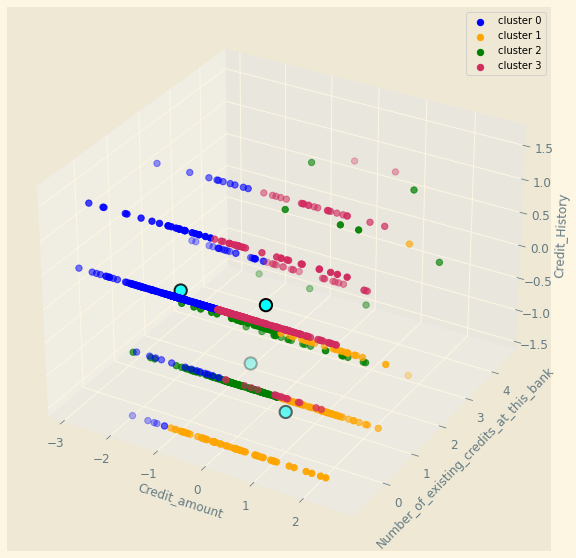

In [121]:
# 3d scatterplot using matplotlib
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X4_scaled[y4_pred == 0,0],X4_scaled[y4_pred == 0,1],X4_scaled[y4_pred == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(X4_scaled[y4_pred == 1,0],X4_scaled[y4_pred == 1,1],X4_scaled[y4_pred == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(X4_scaled[y4_pred == 2,0],X4_scaled[y4_pred == 2,1],X4_scaled[y4_pred == 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.scatter(X4_scaled[y4_pred == 3,0],X4_scaled[y4_pred == 3,1],X4_scaled[y4_pred == 3,2], s = 40 , color = '#D12B60', label = "cluster 3")
ax.scatter(kmeansX4_scaled.cluster_centers_[:,0], kmeansX4_scaled.cluster_centers_[:,1],kmeansX4_scaled.cluster_centers_[:,2],s=150, c='cyan', edgecolors='black', linewidth = 2)
ax.set_xlabel('Credit_amount')
ax.set_ylabel('Number_of_existing_credits_at_this_bank')
ax.set_zlabel('Credit_History')
ax.legend()
plt.show()

In [122]:
# Evaluating the model using Silhouette Score for comparison with Hierarchical Clustering
score = silhouette_score(X4_scaled, kmeansX4_scaled.labels_, metric = 'euclidean')
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.373


#### Improving the model - Customer Segmentation using (Credit_amount, Number_of_existing_credits_at_this_bank, Credit_History)

For n_clusters = 2 The average silhouette_score is : 0.4450967240559564
For n_clusters = 3 The average silhouette_score is : 0.37730853919822865
For n_clusters = 4 The average silhouette_score is : 0.37333566132227003
For n_clusters = 5 The average silhouette_score is : 0.40964080236559713
For n_clusters = 6 The average silhouette_score is : 0.447413663868024


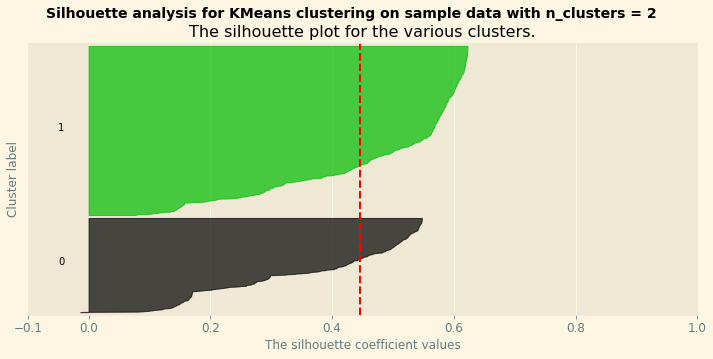

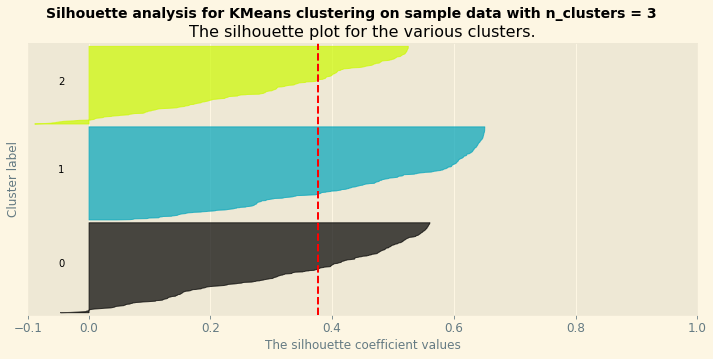

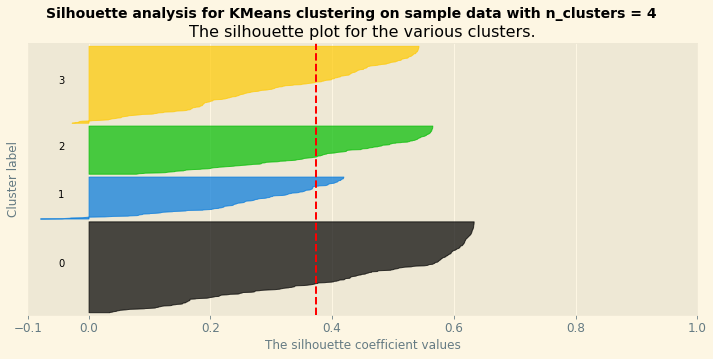

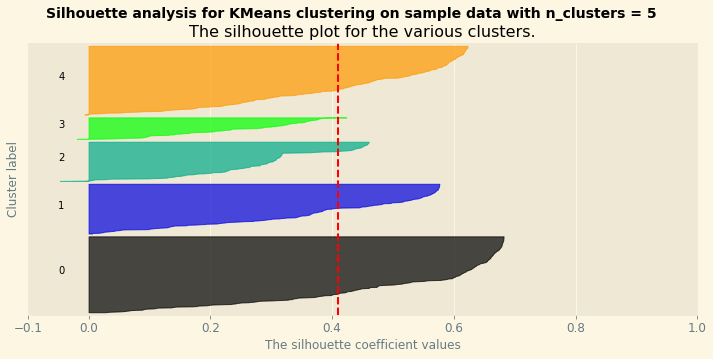

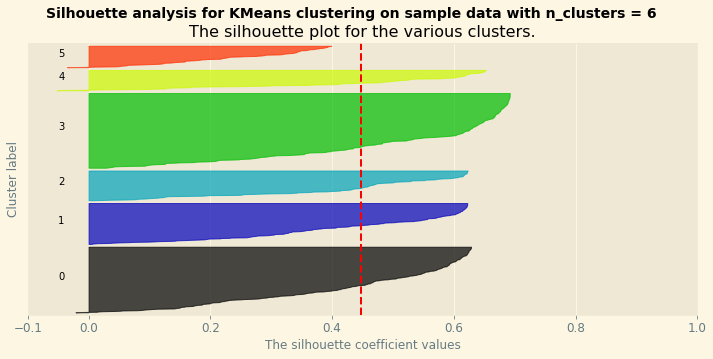

In [123]:
# Reference I had utilized from Sci-Kit Learn:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(12, 5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X4_scaled) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init=50, max_iter = 450,
                        random_state = 10, algorithm = 'elkan')
    cluster_labels = clusterer.fit_predict(X4_scaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X4_scaled, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X4_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [124]:
kmeans = KMeans(n_clusters=6, n_init=50, max_iter = 450, random_state = 10, algorithm = 'elkan')
y_pred = kmeans.fit_predict(X4_scaled)

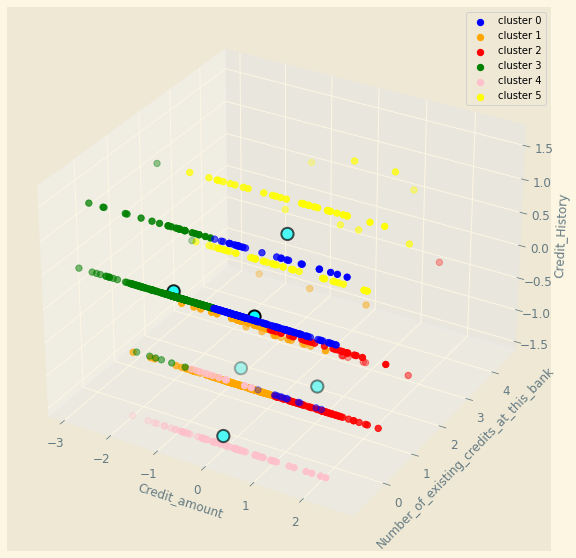

In [125]:
# 3d scatterplot using matplotlib
# Reference I had used as it is hard to interpret the 3D scatterplot

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X4_scaled[y_pred == 0,0],X4_scaled[y_pred == 0,1],X4_scaled[y_pred == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(X4_scaled[y_pred == 1,0],X4_scaled[y_pred == 1,1],X4_scaled[y_pred == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(X4_scaled[y_pred == 2,0],X4_scaled[y_pred == 2,1],X4_scaled[y_pred == 2,2], s = 40 , color = 'red', label = "cluster 2")
ax.scatter(X4_scaled[y_pred == 3,0],X4_scaled[y_pred == 3,1],X4_scaled[y_pred == 3,2], s = 40 , color = 'green', label = "cluster 3")
ax.scatter(X4_scaled[y_pred == 4,0],X4_scaled[y_pred == 4,1],X4_scaled[y_pred == 4,2], s = 40 , color = 'pink', label = "cluster 4")
ax.scatter(X4_scaled[y_pred == 5,0],X4_scaled[y_pred == 5,1],X4_scaled[y_pred == 5,2], s = 40 , color = 'yellow', label = "cluster 5")

ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2],
           s=150, c='cyan', edgecolors='black', linewidth = 2)
ax.set_xlabel('Credit_amount')
ax.set_ylabel('Number_of_existing_credits_at_this_bank')
ax.set_zlabel('Credit_History')
ax.legend()
plt.show()

In [126]:
# Evaluating the model using Silhouette Score for comparison with Hierarchical Clustering
score = silhouette_score(X4_scaled, kmeans.labels_, metric = 'euclidean')
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.447


In [127]:
# Add in cluster information into original dataframe (dat)
dfKMeans4['Cluster']=y_pred
dfKMeans4.head()

Credit_amount  Number_of_existing_credits_at_this_bank  Credit_History  \
0           1169                                        2               0   
1           5951                                        1               2   
2           2096                                        1               0   
3           7882                                        1               2   
4           4870                                        2               1   

   Cluster  
0        1  
1        0  
2        4  
3        0  
4        2

Credit_amount


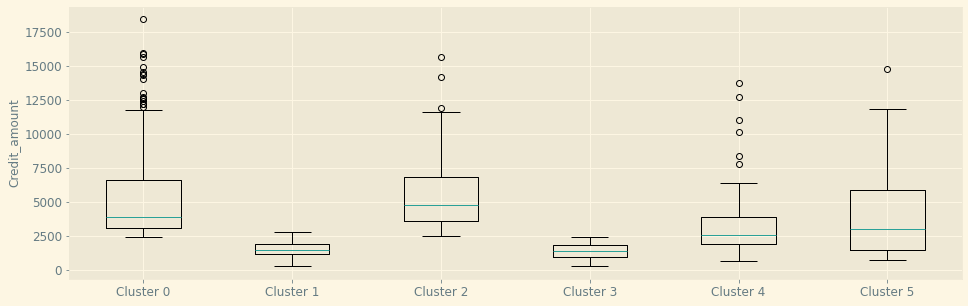

Number_of_existing_credits_at_this_bank


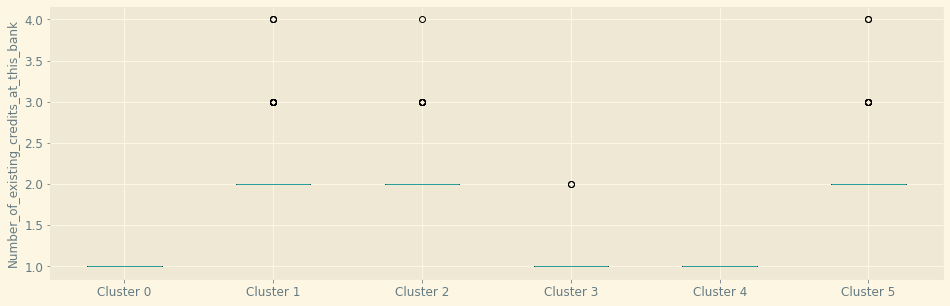

Credit_History


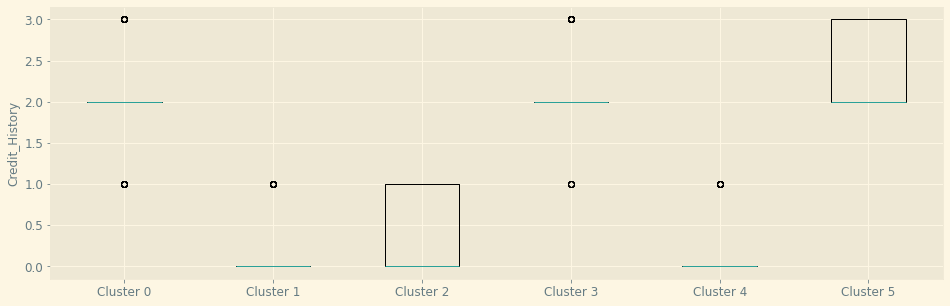

Cluster


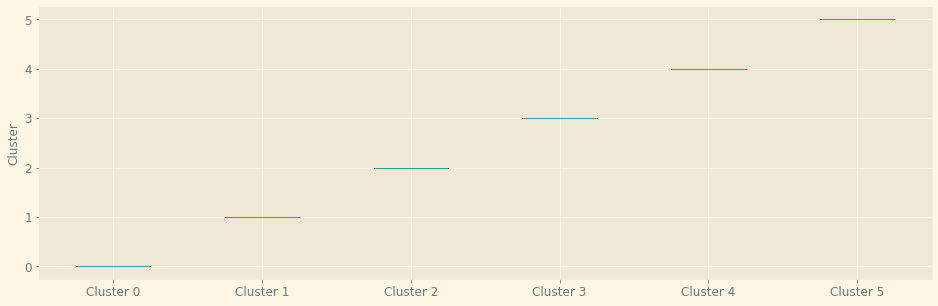

In [128]:
# Groupped Boxplots
i=0
for col in dfKMeans4: 
    print(col) 
    plt.cla()
    plt.boxplot([dfKMeans4.iloc[:,i][dfKMeans4.Cluster==0].tolist(),
                 dfKMeans4.iloc[:,i][dfKMeans4.Cluster==1].tolist(),
                 dfKMeans4.iloc[:,i][dfKMeans4.Cluster==2].tolist(),
                 dfKMeans4.iloc[:,i][dfKMeans4.Cluster==3].tolist(),
                 dfKMeans4.iloc[:,i][dfKMeans4.Cluster==4].tolist(),
                dfKMeans4.iloc[:,i][dfKMeans4.Cluster==5].tolist()],
                 labels=('Cluster 0','Cluster 1','Cluster 2','Cluster 3','Cluster 4', 'Cluster 5'))    
    plt.ylabel(col)
    plt.show()
    i=i+1

### Hierarchical Clustering Model 4 (Credit_amount, Number_of_existing_credits_at_this_bank, Credit_History)

#### Customer Segmentation using  (Credit_amount, Number_of_existing_credits_at_this_bank, Credit_History)

In [129]:
# Perform hierarchical/agglomerative clustering
Z4 = shc.linkage(X4_scaled, method = 'ward')
Z4 # A condensed distance matrix

array([[   0.        ,  894.        ,    0.        ,    2.        ],
       [ 209.        ,  508.        ,    0.        ,    2.        ],
       [  15.        ,  155.        ,    0.        ,    2.        ],
       ...,
       [1991.        , 1995.        ,   24.71264314,  534.        ],
       [1987.        , 1996.        ,   25.51679024,  724.        ],
       [1994.        , 1997.        ,   47.50899513, 1000.        ]])

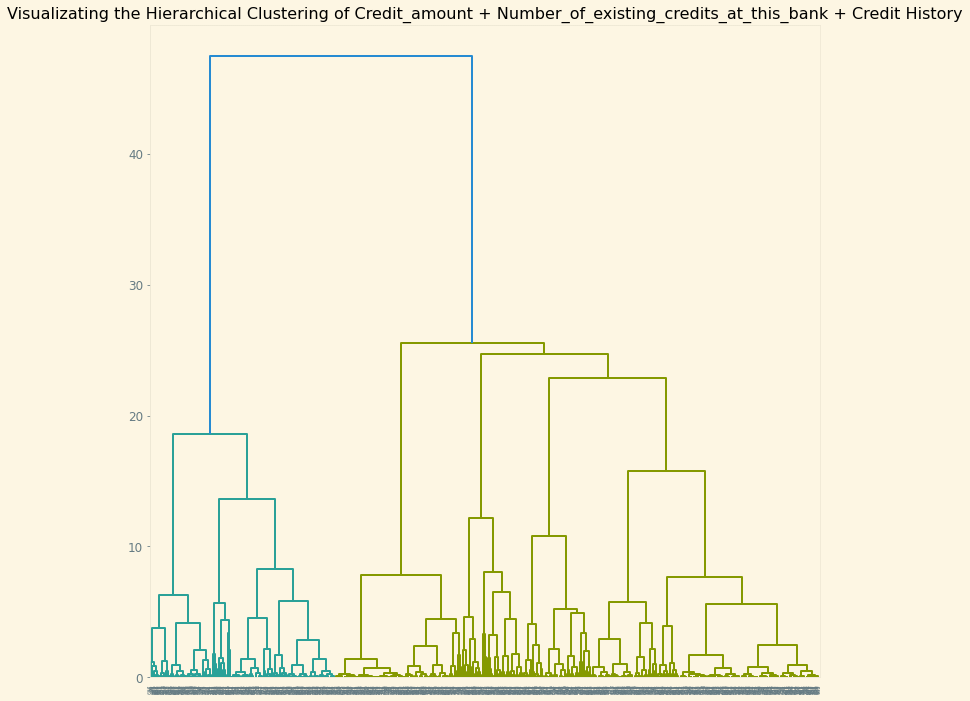

In [130]:
# Visualizing the hierarchical clustering through dendograms
# to find a a rough estimate of the optimal number of clusters

plt.figure(figsize = (12,12))
plt.title('Visualizating the Hierarchical Clustering of Credit_amount + Number_of_existing_credits_at_this_bank + Credit History')
Dendogram = shc.dendrogram(Z4)

In [131]:
# Building the Agglomerative Clustering model with number of clusters set to 3
hClusterX4_scaled = AgglomerativeClustering(n_clusters = 2, linkage = 'ward', affinity = 'euclidean')
hClusterX4_scaled

AgglomerativeClustering()

In [132]:
# Fitting the model to the data and predictign the clusters
hClusterX4_scaled.fit_predict(X4_scaled)

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,

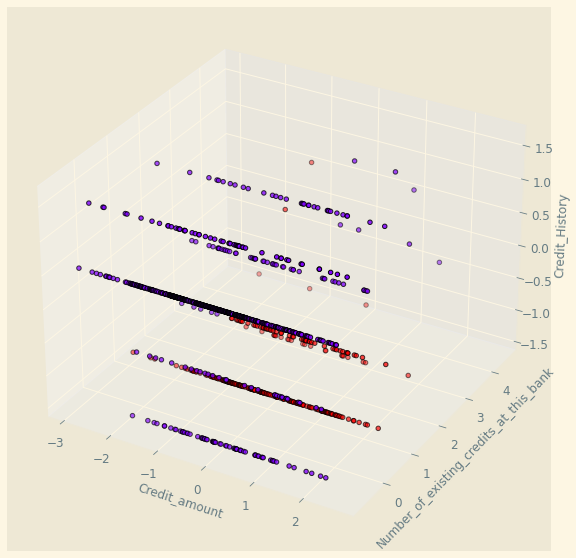

In [133]:
# 3d scatterplot using matplotlib
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection="3d")
ax.scatter3D(X4_scaled[:,0], X4_scaled[:,1], X4_scaled[:,2], c= hClusterX4_scaled.fit_predict(X4_scaled),cmap = 'rainbow',
            edgecolor = 'black');

ax.set_xlabel('Credit_amount')
ax.set_ylabel('Number_of_existing_credits_at_this_bank')
ax.set_zlabel('Credit_History')
plt.show()

In [134]:
# Evaluating the model using Silhouette Score for comparison with Hierarchical Clustering
score = silhouette_score(X4_scaled, hClusterX4_scaled.labels_, metric = 'euclidean')
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.425


#### Improving the model - Customer Segmentation using  (Credit_amount, Number_of_existing_credits_at_this_bank, Credit_History)

In [135]:
k_range = range(2, 7)
silhouette_scorings = []
for i in k_range:
    ac_i = AgglomerativeClustering(n_clusters = i, linkage = 'ward',affinity = 'euclidean')
    silhouette_scorings.append(silhouette_score(X4_scaled, ac_i.fit_predict(X4_scaled)))

In [136]:
silhouette_scorings

[0.42473320329981995,
 0.28682630801651693,
 0.3455649496854663,
 0.39695378174144424,
 0.40598397190752206]

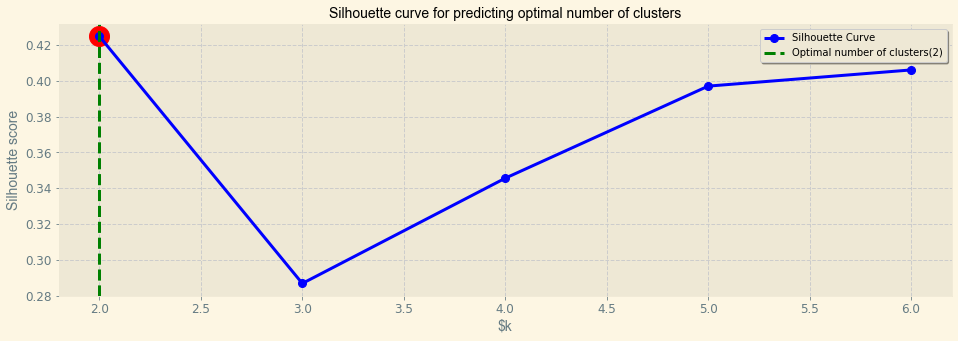

In [137]:
# Reference I had utilized to build the following plot:
# https://www.youtube.com/watch?v=Qh7VxLsaU9M

# Plot the silhouettes scores graph
rcParams['figure.figsize'] = 16,5
plt.plot(range(2,7), silhouette_scorings, "bo-",
         linewidth = 3, markersize=8, label = 'Silhouette Curve')
plt.xlabel("$k", fontsize=14, family='Arial')
plt.ylabel("Silhouette score", fontsize=14, family='Arial')
plt.grid(which = "major", color = '#cccccc', linestyle='--')
plt.title("Silhouette curve for predicting optimal number of clusters",
         family='Arial', fontsize = 14)

# Calculate the optimal number of clusters
k = np.argmax(silhouette_scorings) + 2

# Draw a veritical line to mark the optimal number of cluster
plt.axvline(x=k, linestyle='--', c='green', linewidth = 3,
           label = 'Optimal number of clusters({})'.format(k))
plt.scatter(k, silhouette_scorings[k-2], c='red', s=400)
plt.legend(shadow = True)
plt.show()

In [138]:
# Building the Agglomerative Clustering model with number of clusters set to 2
hClusterX4_scaled_improved = AgglomerativeClustering(
    n_clusters = 2, linkage = 'ward', affinity = 'euclidean')
hClusterX4_scaled_improved

AgglomerativeClustering()

In [139]:
# Fitting the model to the data and predictign the clusters
hClusterX4_scaled_improved.fit_predict(X4_scaled)

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,

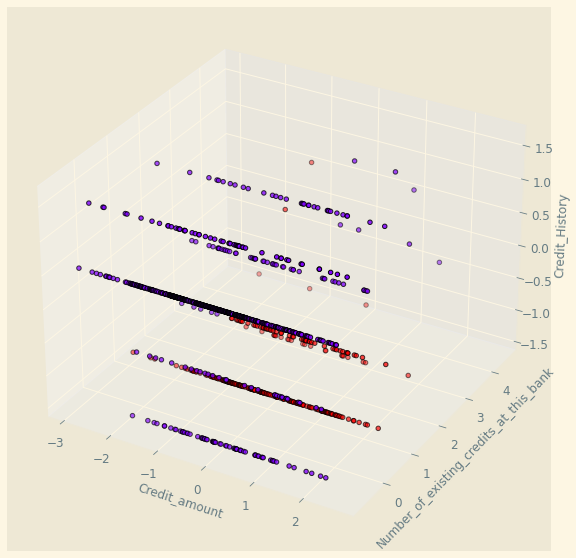

In [140]:
# 3d scatterplot using matplotlib
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection="3d")
ax.scatter3D(X4_scaled[:,0], X4_scaled[:,1], X4_scaled[:,2], c= hClusterX4_scaled_improved.fit_predict(X4_scaled), cmap = 'rainbow',
            edgecolor = 'black');

ax.set_xlabel('Credit_amount')
ax.set_ylabel('Number_of_existing_credits_at_this_bank')
ax.set_zlabel('Credit_History')
plt.show()

In [141]:
# Evaluating the model using Silhouette Score for comparison with Hierarchical Clustering
score = silhouette_score(X4_scaled, hClusterX4_scaled_improved.labels_, metric = 'euclidean')
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.425


### K-Means Clustering Model 5 (Account Status, Housing, Credit Amount)

In [142]:
df5 = df.copy(deep = True)
df_status_housing_credAmount = df5.loc[:,['Account_Status', 'Housing', 'Credit_amount']]

# Statistics of newly created dataframe
df_status_housing_credAmount.describe()

Account_Status      Housing  Credit_amount
count     1000.000000  1000.000000    1000.000000
mean         1.001000     1.605000       7.788691
std          0.957034     0.674856       0.776474
min          0.000000     0.000000       5.521461
25%          0.000000     1.000000       7.219276
50%          1.000000     2.000000       7.749107
75%          2.000000     2.000000       8.287088
max          3.000000     2.000000       9.821409

In [143]:
# Convert dataframe into numpy array, X5
X5 = df_status_housing_credAmount.values
# Scaling feature to ensure that they are comparable
scaler = StandardScaler()
X5_scaled = scaler.fit_transform(X5)

In [144]:
# Using elkan algorithm instead as it would be more efficient than lloyd
# as we are using larger values of n_init and max_iter
kmeansX5_scaled = KMeans(n_clusters=4, n_init=50, max_iter = 450,
                        random_state = 10, algorithm = 'elkan')

# Fitting the model based on the X3_scaled dataset
kmeansX5_scaled.fit(X5_scaled)

KMeans(algorithm='elkan', max_iter=450, n_clusters=4, n_init=50,
       random_state=10)

In [145]:
# Viewing the coordinates of the centroids identified
kmeansX5_scaled.cluster_centers_

array([[ 0.13485883, -1.69750757,  0.54409659],
       [-0.37815943,  0.54498553,  1.03741472],
       [-0.68905511,  0.35329631, -0.69648075],
       [ 1.294363  ,  0.41801164, -0.39803653]])

In [146]:
# Assigning data points to their respective cluster based on nearest centroid
y5_pred = kmeansX5_scaled.predict(X5_scaled)

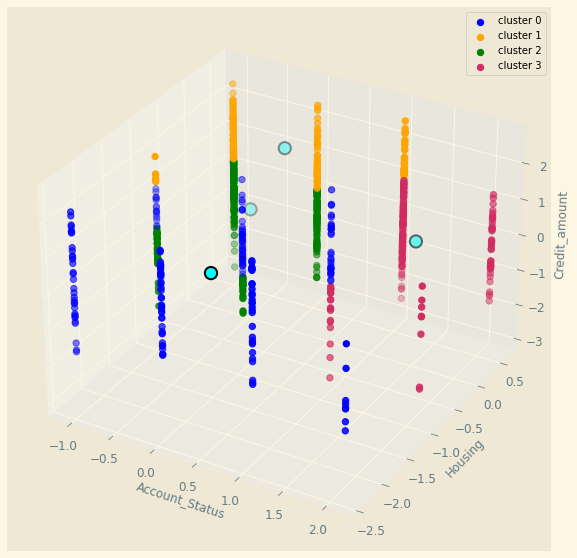

In [147]:
# 3d scatterplot using matplotlib
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X5_scaled[y5_pred == 0,0],X5_scaled[y5_pred == 0,1],X5_scaled[y5_pred == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(X5_scaled[y5_pred == 1,0],X5_scaled[y5_pred == 1,1],X5_scaled[y5_pred == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(X5_scaled[y5_pred == 2,0],X5_scaled[y5_pred == 2,1],X5_scaled[y5_pred == 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.scatter(X5_scaled[y5_pred == 3,0],X5_scaled[y5_pred == 3,1],X5_scaled[y5_pred == 3,2], s = 40 , color = '#D12B60', label = "cluster 3")
ax.scatter(kmeansX5_scaled.cluster_centers_[:,0], kmeansX5_scaled.cluster_centers_[:,1],kmeansX5_scaled.cluster_centers_[:,2],s=150, c='cyan', edgecolors='black', linewidth = 2)
ax.set_xlabel('Account_Status')
ax.set_ylabel('Housing')
ax.set_zlabel('Credit_amount')
ax.legend()
plt.show()

In [148]:
# Evaluating the model using Silhouette Score for comparison with Hierarchical Clustering
score = silhouette_score(X5_scaled, kmeansX5_scaled.labels_, metric = 'euclidean')
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.335


#### Improving the model - Customer Segmentation using (Account Status, Housing, Credit Amount)

For n_clusters = 2 The average silhouette_score is : 0.34023596885003243
For n_clusters = 3 The average silhouette_score is : 0.35801852747368684
For n_clusters = 4 The average silhouette_score is : 0.3346008861135633
For n_clusters = 5 The average silhouette_score is : 0.35264505370200616
For n_clusters = 6 The average silhouette_score is : 0.355190161439399


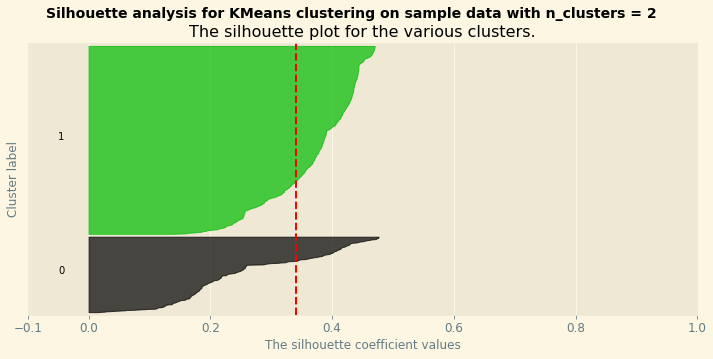

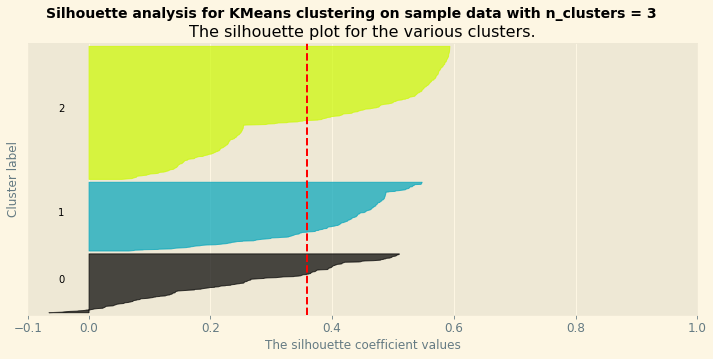

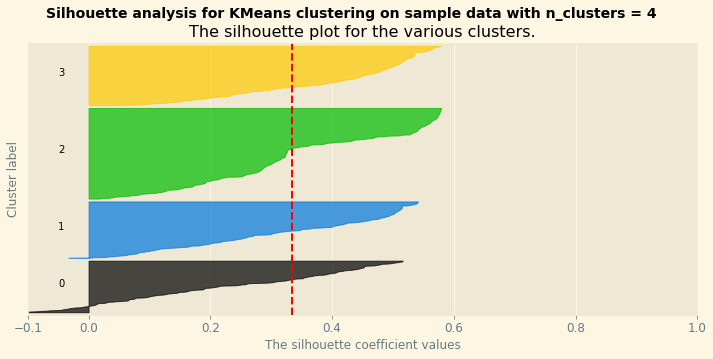

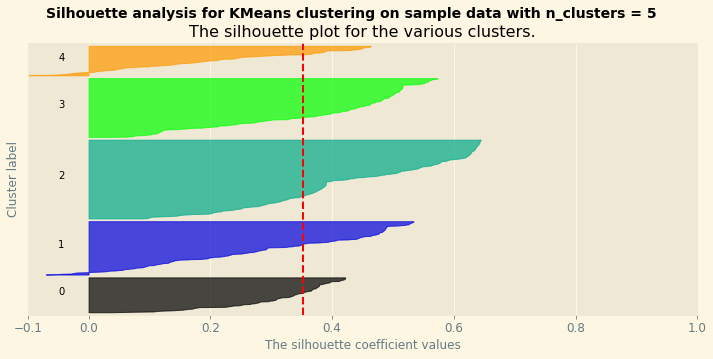

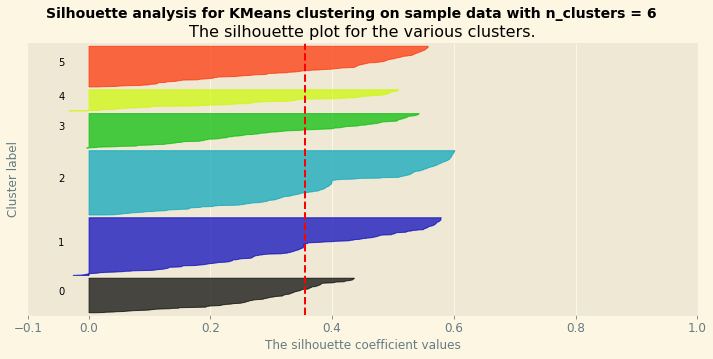

In [149]:
# Reference I had utilized from Sci-Kit Learn:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(12, 5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X5_scaled) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init=50, max_iter = 450,
                        random_state = 10, algorithm = 'elkan')
    cluster_labels = clusterer.fit_predict(X5_scaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X5_scaled, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X5_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [150]:
kmeans = KMeans(n_clusters=3, n_init=50, max_iter = 450, random_state = 10, algorithm = 'elkan')
y_pred = kmeans.fit_predict(X5_scaled)

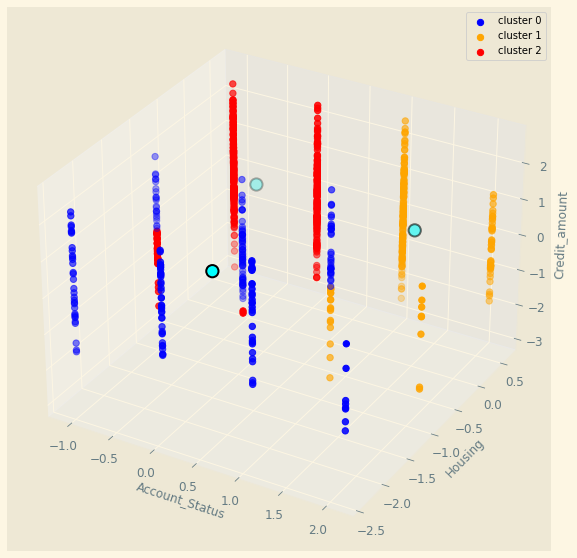

In [151]:
# 3d scatterplot using matplotlib
# Reference I had used as it is hard to interpret the 3D scatterplot

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X5_scaled[y_pred == 0,0],X5_scaled[y_pred == 0,1],X5_scaled[y_pred == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(X5_scaled[y_pred == 1,0],X5_scaled[y_pred == 1,1],X5_scaled[y_pred == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(X5_scaled[y_pred == 2,0],X5_scaled[y_pred == 2,1],X5_scaled[y_pred == 2,2], s = 40 , color = 'red', label = "cluster 2")

ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2],
           s=150, c='cyan', edgecolors='black', linewidth = 2)
ax.set_xlabel('Account_Status')
ax.set_ylabel('Housing')
ax.set_zlabel('Credit_amount')
ax.legend()
plt.show()

In [152]:
# Evaluating the model using Silhouette Score for comparison with Hierarchical Clustering
score = silhouette_score(X5_scaled, kmeans.labels_, metric = 'euclidean')
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.358


In [153]:
# Add in cluster information into original dataframe (dat)
dfKMeans5['Cluster']=y_pred
dfKMeans5.head()

Account_Status  Housing  Credit_amount  Cluster
0               1        2           1169        2
1               2        2           5951        1
2               0        2           2096        2
3               1        0           7882        0
4               1        0           4870        0

Account_Status


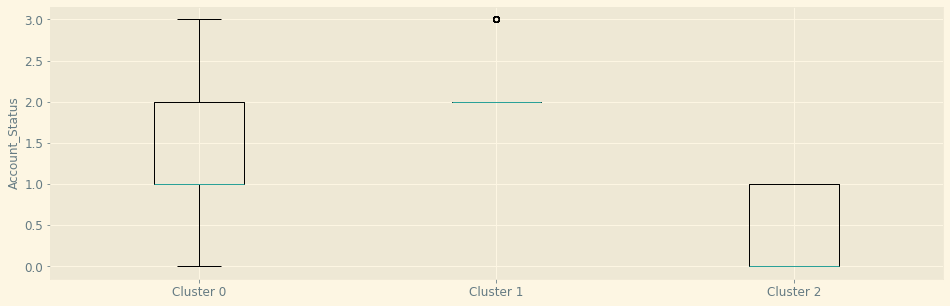

Housing


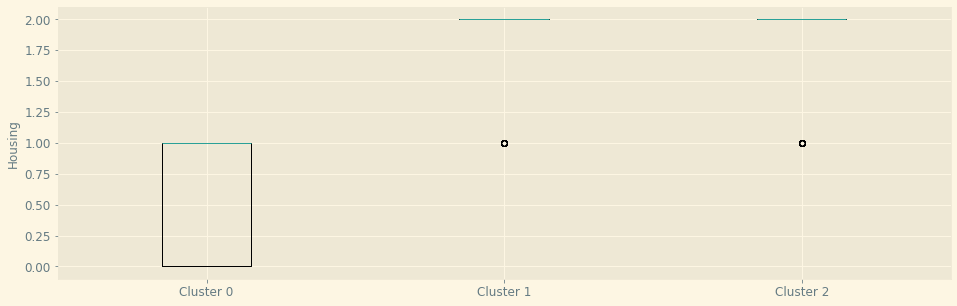

Credit_amount


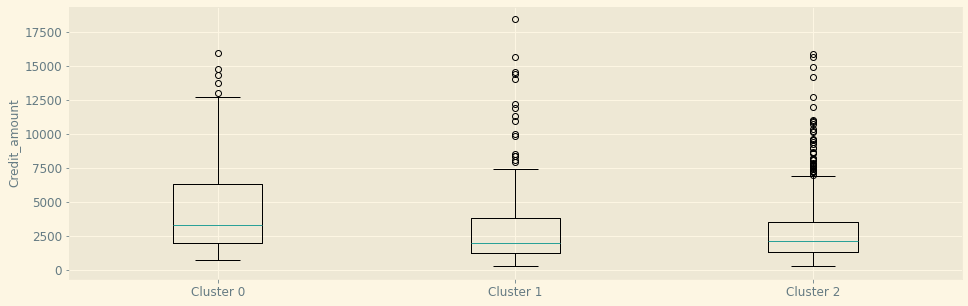

Cluster


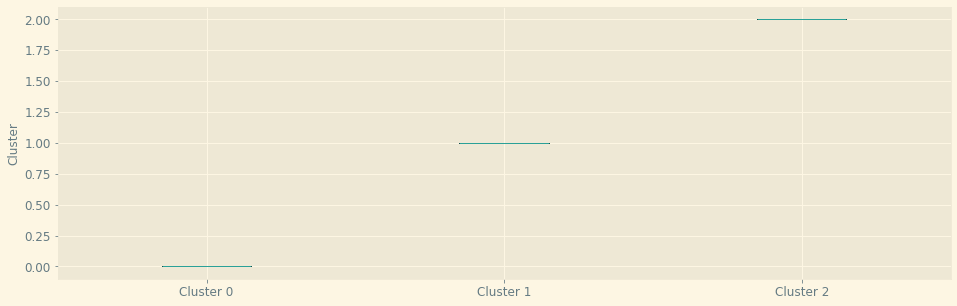

In [154]:
# Groupped Boxplots
i=0
for col in dfKMeans5: 
    print(col) 
    plt.cla()
    plt.boxplot([dfKMeans5.iloc[:,i][dfKMeans5.Cluster==0].tolist(),
                 dfKMeans5.iloc[:,i][dfKMeans5.Cluster==1].tolist(),
                 dfKMeans5.iloc[:,i][dfKMeans5.Cluster==2].tolist()],
                 labels=('Cluster 0','Cluster 1','Cluster 2'))    
    plt.ylabel(col)
    plt.show()
    i=i+1

### Hierarchical Clustering Model 5 (Account Status, Housing, Credit Amount)

In [155]:
# Perform hierarchical/agglomerative clustering
Z5 = shc.linkage(X5_scaled, method = 'ward')
Z5 # A condensed distance matrix

array([[ 486.        ,  716.        ,    0.        ,    2.        ],
       [  25.        ,  536.        ,    0.        ,    2.        ],
       [ 604.        ,  729.        ,    0.        ,    2.        ],
       ...,
       [1988.        , 1991.        ,   21.69223046,  453.        ],
       [1995.        , 1996.        ,   34.15027295,  718.        ],
       [1994.        , 1997.        ,   41.57671724, 1000.        ]])

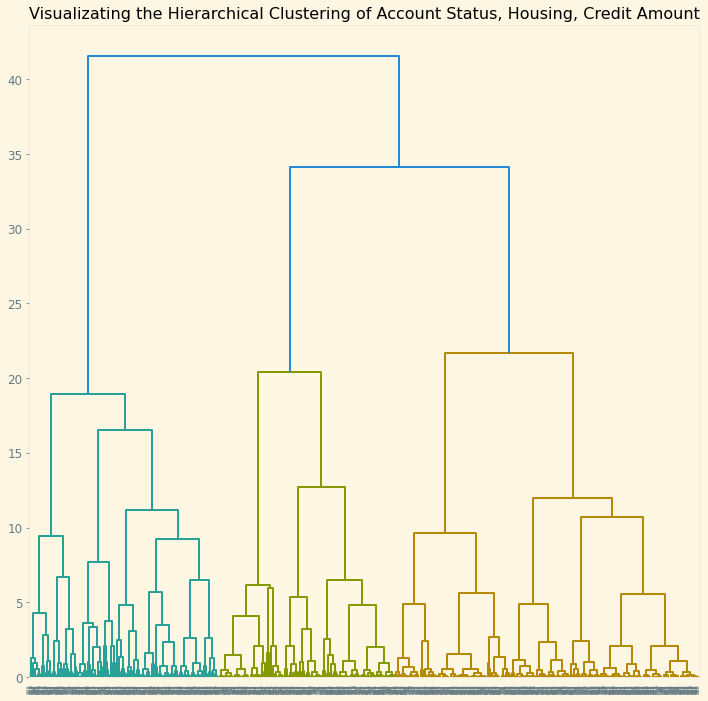

In [156]:
# Visualizing the hierarchical clustering through dendograms
# to find a a rough estimate of the optimal number of clusters

plt.figure(figsize = (12,12))
plt.title('Visualizating the Hierarchical Clustering of Account Status, Housing, Credit Amount')
Dendogram = shc.dendrogram(Z5)

In [157]:
# Building the Agglomerative Clustering model with number of clusters set to 3
hClusterX5_scaled = AgglomerativeClustering(n_clusters = 3, linkage = 'ward', affinity = 'euclidean')
hClusterX5_scaled

AgglomerativeClustering(n_clusters=3)

In [158]:
# Fitting the model to the data and predictign the clusters
hClusterX5_scaled.fit_predict(X5_scaled)

array([0, 2, 0, 1, 1, 1, 0, 1, 0, 2, 1, 1, 2, 0, 1, 0, 0, 2, 1, 0, 0, 1,
       1, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 1, 2, 2, 1, 2, 2, 2, 0, 2, 2, 1,
       1, 0, 0, 1, 0, 0, 2, 2, 0, 0, 1, 0, 2, 0, 2, 1, 2, 2, 1, 2, 0, 0,
       0, 2, 1, 0, 0, 1, 1, 2, 0, 1, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0, 2, 1,
       0, 0, 0, 0, 0, 1, 2, 1, 0, 2, 2, 1, 1, 1, 0, 1, 1, 2, 0, 2, 2, 2,
       2, 2, 1, 0, 0, 0, 2, 1, 0, 2, 0, 1, 1, 1, 1, 0, 0, 2, 2, 0, 2, 2,
       0, 1, 0, 0, 0, 2, 2, 1, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 2, 1,
       1, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 2, 1, 0, 2, 2, 0, 0,
       0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 1, 1, 0, 2, 0, 1, 2, 1, 1, 2, 0, 1,
       1, 2, 0, 0, 0, 1, 0, 1, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 1, 0,
       2, 1, 0, 0, 0, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 0, 2, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 2, 1, 0, 2, 2, 0, 2, 2, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 2, 0, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 0, 1, 1, 0, 2, 0, 2, 2,
       0, 1, 2, 0, 0, 1, 1, 1, 0, 2, 1, 0, 0, 2, 0,

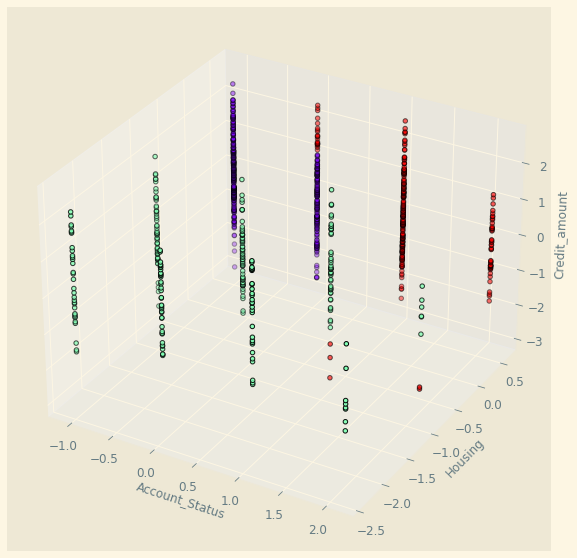

In [159]:
# 3d scatterplot using matplotlib
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection="3d")
ax.scatter3D(X5_scaled[:,0], X5_scaled[:,1], X5_scaled[:,2], c= hClusterX5_scaled.fit_predict(X5_scaled),cmap = 'rainbow',
            edgecolor = 'black');

ax.set_xlabel('Account_Status')
ax.set_ylabel('Housing')
ax.set_zlabel('Credit_amount')
plt.show()

In [160]:
# Evaluating the model using Silhouette Score for comparison with Hierarchical Clustering
score = silhouette_score(X5_scaled, hClusterX5_scaled.labels_, metric = 'euclidean')
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.350


#### Improving the model - Customer Segmentation using (Account Status, Housing, Credit Amount)

In [161]:
k_range = range(2, 7)
silhouette_scorings = []
for i in k_range:
    ac_i = AgglomerativeClustering(n_clusters = i, linkage = 'ward',affinity = 'euclidean')
    silhouette_scorings.append(silhouette_score(X5_scaled, ac_i.fit_predict(X5_scaled)))

In [162]:
silhouette_scorings

[0.33825150753229744,
 0.35042935491906685,
 0.29784936462927447,
 0.30003563406280387,
 0.3143129940352744]

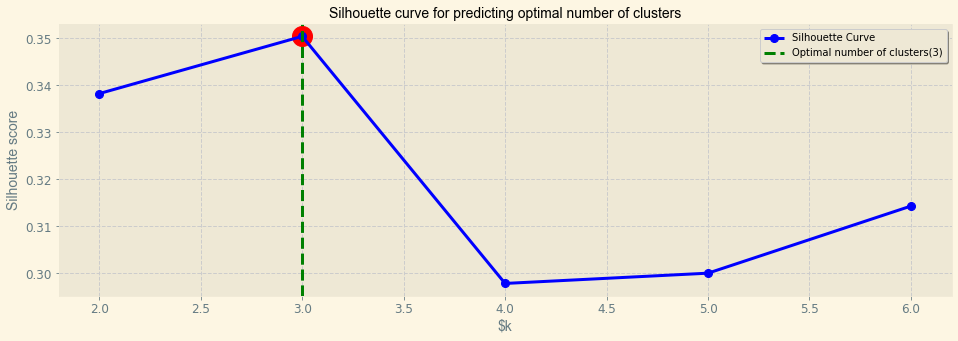

In [163]:
# Reference I had utilized to build the following plot:
# https://www.youtube.com/watch?v=Qh7VxLsaU9M

# Plot the silhouettes scores graph
rcParams['figure.figsize'] = 16,5
plt.plot(range(2,7), silhouette_scorings, "bo-",
         linewidth = 3, markersize=8, label = 'Silhouette Curve')
plt.xlabel("$k", fontsize=14, family='Arial')
plt.ylabel("Silhouette score", fontsize=14, family='Arial')
plt.grid(which = "major", color = '#cccccc', linestyle='--')
plt.title("Silhouette curve for predicting optimal number of clusters",
         family='Arial', fontsize = 14)

# Calculate the optimal number of clusters
k = np.argmax(silhouette_scorings) + 2

# Draw a veritical line to mark the optimal number of cluster
plt.axvline(x=k, linestyle='--', c='green', linewidth = 3,
           label = 'Optimal number of clusters({})'.format(k))
plt.scatter(k, silhouette_scorings[k-2], c='red', s=400)
plt.legend(shadow = True)
plt.show()

In [164]:
# Building the Agglomerative Clustering model with number of clusters set to 3
hClusterX5_scaled_improved = AgglomerativeClustering(
    n_clusters = 3, linkage = 'ward', affinity = 'euclidean')
hClusterX5_scaled_improved

AgglomerativeClustering(n_clusters=3)

In [165]:
# Fitting the model to the data and predictign the clusters
hClusterX5_scaled_improved.fit_predict(X5_scaled)

array([0, 2, 0, 1, 1, 1, 0, 1, 0, 2, 1, 1, 2, 0, 1, 0, 0, 2, 1, 0, 0, 1,
       1, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 1, 2, 2, 1, 2, 2, 2, 0, 2, 2, 1,
       1, 0, 0, 1, 0, 0, 2, 2, 0, 0, 1, 0, 2, 0, 2, 1, 2, 2, 1, 2, 0, 0,
       0, 2, 1, 0, 0, 1, 1, 2, 0, 1, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0, 2, 1,
       0, 0, 0, 0, 0, 1, 2, 1, 0, 2, 2, 1, 1, 1, 0, 1, 1, 2, 0, 2, 2, 2,
       2, 2, 1, 0, 0, 0, 2, 1, 0, 2, 0, 1, 1, 1, 1, 0, 0, 2, 2, 0, 2, 2,
       0, 1, 0, 0, 0, 2, 2, 1, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 2, 1,
       1, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 2, 1, 0, 2, 2, 0, 0,
       0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 1, 1, 0, 2, 0, 1, 2, 1, 1, 2, 0, 1,
       1, 2, 0, 0, 0, 1, 0, 1, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 1, 0,
       2, 1, 0, 0, 0, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 0, 2, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 2, 1, 0, 2, 2, 0, 2, 2, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 2, 0, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 0, 1, 1, 0, 2, 0, 2, 2,
       0, 1, 2, 0, 0, 1, 1, 1, 0, 2, 1, 0, 0, 2, 0,

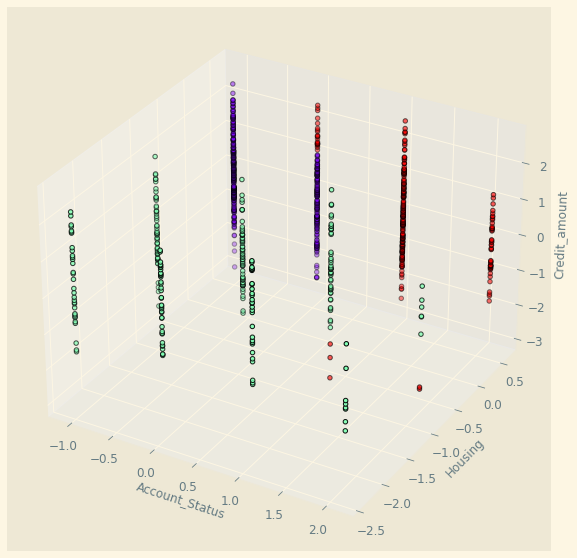

In [166]:
# 3d scatterplot using matplotlib
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection="3d")
ax.scatter3D(X5_scaled[:,0], X5_scaled[:,1], X5_scaled[:,2], c= hClusterX5_scaled_improved.fit_predict(X5_scaled), cmap = 'rainbow',
            edgecolor = 'black');

ax.set_xlabel('Account_Status')
ax.set_ylabel('Housing')
ax.set_zlabel('Credit_amount')
plt.show()

In [167]:
# Evaluating the model using Silhouette Score for comparison with Hierarchical Clustering
score = silhouette_score(X5_scaled, hClusterX5_scaled_improved.labels_, metric = 'euclidean')
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.350
